# Flight Delay Prediction
## Problem Statement:
Flight delays are a significant inconvenience for passengers and a challenge for airlines and airport operations. Delays can be caused by various factors, including weather conditions, air traffic control, technical issues, and operational constraints. Predicting flight delays can help airlines and passengers plan better, reduce operational costs, and improve customer satisfaction.

## Criteria for Defining Delays:
* Delayed Flight: A flight is considered delayed if it arrives late at its destination. This includes any flight that does not reach its scheduled destination arrival time.
* On-time Flight: If a flight arrives at its destination on or before the scheduled arrival time, it is considered on time, regardless of any delays encountered during departure or en route.


## Aim:
* The goal is to develop a predictive model that accurately forecasts flight delays. 

## Dataset Attributes
Here is a brief overview of the dataset columns: 
* FlightDate: The date of the flight (format: YYYY-MM-DD).
* Airline: The airline operating the flight.
* Origin: The airport code for the origin airport.
* Dest: The airport code for the destination airport.
* Cancelled: Indicates whether the flight was cancelled (True or False).
* Diverted: Indicates whether the flight was diverted (True or False).
* CRSDepTime: The scheduled departure time (in local time, HHMM).
* DepTime: The actual departure time (in local time, HHMM).
* DepDelayMinutes: The total minutes of departure delay.
* DepDelay: The departure delay in minutes (DepTime - CRSDepTime).
* ArrTime: The actual arrival time (in local time, HHMM).
* ArrDelayMinutes: The total minutes of arrival delay.
* AirTime: The time spent in the air in minutes.
* CRSElapsedTime: The scheduled elapsed time of the flight in minutes.
* ActualElapsedTime: The actual elapsed time of the flight in minutes.
* Distance: The distance between the origin and destination airports in miles.
* Year: The year of the flight.
* Quarter: The quarter of the year (1 = Jan-Mar, 2 = Apr-Jun, 3 = Jul-Sep, 4 = Oct-Dec).
* Month: The month of the flight.
* DayofMonth: The day of the month of the flight.
* DayOfWeek: The day of the week of the flight (1 = Monday, 2 = Tuesday, ..., 7 = Sunday).
* Marketing_Airline_Network: The marketing airline network.
* Operated_or_Branded_Code_Share_Partners: The operated or branded code share partners.
* DOT_ID_Marketing_Airline: The Department of Transportation ID for the marketing airline.
* IATA_Code_Marketing_Airline: The IATA code for the marketing airline.
* Flight_Number_Marketing_Airline: The flight number for the marketing airline.
* Operating_Airline: The airline operating the flight.
* DOT_ID_Operating_Airline: The Department of Transportation ID for the operating airline.
* IATA_Code_Operating_Airline: The IATA code for the operating airline.
* Tail_Number: The tail number of the aircraft.
* Flight_Number_Operating_Airline: The flight number for the operating airline.
* OriginAirportID: The ID of the origin airport.
* OriginAirportSeqID: The sequence ID of the origin airport.
* OriginCityMarketID: The city market ID of the origin city.
* OriginCityName: The name of the origin city.
* OriginState: The state code of the origin state.
* OriginStateFips: The FIPS code of the origin state.
* OriginStateName: The name of the origin state.
* OriginWac: The world area code of the origin airport.
* DestAirportID: The ID of the destination airport.
* DestAirportSeqID: The sequence ID of the destination airport.
* DestCityMarketID: The city market ID of the destination city.
* DestCityName: The name of the destination city.
* DestState: The state code of the destination state.
* DestStateFips: The FIPS code of the destination state.
* DestStateName: The name of the destination state.
* DestWac: The world area code of the destination airport.
* DepDel15: Indicates if the departure delay is 15 minutes or more (0 = No, 1 = Yes).
* DepartureDelayGroups: Grouping of departure delays in 15-minute intervals.
* DepTimeBlk: The departure time block, e.g., "0600-0659".
* TaxiOut: The taxi-out time in minutes.
* WheelsOff: The wheels-off time (in local time, HHMM).
* WheelsOn: The wheels-on time (in local time, HHMM).
* TaxiIn: The taxi-in time in minutes.
* CRSArrTime: The scheduled arrival time (in local time, HHMM).
* ArrDelay: The arrival delay in minutes (ArrTime - CRSArrTime).
* ArrDel15: Indicates if the arrival delay is 15 minutes or more (0 = No, 1 = Yes).
* ArrivalDelayGroups: Grouping of arrival delays in 15-minute intervals.
* ArrTimeBlk: The arrival time block, e.g., "0600-0659".
* DistanceGroup: The distance interval in 250-mile groups.
* DivAirportLandings: The number of times the flight landed at a diversion airport

# Load dataset

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [9]:

df=pd.read_csv('Combined_Flights_2022.csv')


In [10]:
df

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078313  2022-03-31                          Republic Airlines    MSY  EWR   
4078314  2022-03-17                          Republic Airlines    CLT  EWR   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   
4078316  2022-03-25                          Republic Airlines    EWR  PIT   
4078317  2022-03-07                          Republic Airlines    EWR  RDU   

         Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  \
0            False     False        1133   1123.0              0.0     -10.0   
1            False     False         732    728.0              0.0      -4.0   
2            False     False        1529   1514.0              0.0     -15.0   
3            False     False        1435   1430.0              0.0      -5.0   
4            False     False        1135   1135.0              0.0       0.0   
...            ...       ...         ...      ...              ...       ...   
4078313      False      True        1949   2014.0             25.0      25.0   
4078314       True     False        1733   1817.0             44.0      44.0   
4078315      False     False        1700   2318.0            378.0     378.0   
4078316      False      True        2129   2322.0            113.0     113.0   
4078317      False      True        1154   1148.0              0.0      -6.0   

         ...  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  \
0        ...     1140.0    1220.0     8.0        1245     -17.0       0.0   
1        ...      744.0     839.0     9.0         849      -1.0       0.0   
2        ...     1535.0    1622.0    14.0        1639      -3.0       0.0   
3        ...     1446.0    1543.0     4.0        1605     -18.0       0.0   
4        ...     1154.0    1243.0     8.0        1245       6.0       0.0   
...      ...        ...       ...     ...         ...       ...       ...   
4078313  ...     2031.0     202.0    32.0        2354       NaN       NaN   
4078314  ...        NaN       NaN     NaN        1942       NaN       NaN   
4078315  ...     2337.0      52.0     7.0        1838     381.0       1.0   
4078316  ...     2347.0     933.0     6.0        2255       NaN       NaN   
4078317  ...     1201.0    1552.0     4.0        1333       NaN       NaN   

         ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  DivAirportLandings  
0                      -2.0   1200-1259              1                   0  
1                      -1.0   0800-0859              2                   0  
2                      -1.0   1600-1659              2                   0  
3                      -2.0   1600-1659              2                   0  
4                       0.0   1200-1259              2                   0  
...                     ...         ...            ...                 ...  
4078313                 NaN   2300-2359              5                   1  
4078314                 NaN   1900-1959              3                   0  
4078315                12.0   1800-1859              3                   0  
4078316                 NaN   2200-2259              2                   1  
4078317                 NaN   1300-1359              2                   1  

[4078318 rows x 61 columns]

## Data Analysis
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

### How much data is present?

In [11]:
df.shape

(4078318, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

### What attributes/features are continuous valued?

In [5]:
# What attributes/features are continuous valued?
continuous_attributes = df.select_dtypes(include=['number']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Print the result
print("Continuous attributes:", continuous_attributes)
print("Categorical attributes:", categorical_attributes)

Continuous attributes: ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']
Categorical attributes: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName', 'OriginState', 'OriginStateNam

### Unique Values in the columns

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'FlightDate': ['2022-04-04' '2022-04-03' '2022-04-02' '2022-04-01' '2022-04-15'
 '2022-04-09' '2022-04-10' '2022-04-17' '2022-04-18' '2022-04-19'
 '2022-04-20' '2022-04-21' '2022-04-22' '2022-04-11' '2022-04-24'
 '2022-04-25' '2022-04-26' '2022-04-27' '2022-04-28' '2022-04-29'
 '2022-04-12' '2022-04-13' '2022-04-14' '2022-04-05' '2022-04-06'
 '2022-04-07' '2022-04-08' '2022-04-30' '2022-04-16' '2022-04-23'
 '2022-02-28' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-15' '2022-02-17'
 '2022-02-18' '2022-02-19' '2022-02-20' '2022-02-21' '2022-02-23'
 '2022-02-24' '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-02'
 '2022-02-14' '2022-02-16' '2022-02-22' '2022-02-04' '2022-02-05'
 '2022-02-10' '2022-02-03' '2022-02-01' '2022-07-19' '2022-07-20'
 '2022-07-21' '2022-07-24' '2022-07-25' '2022-07-26' '2022-07-27'
 '2022-07-28' '2022-07-31' '2022-07-01' '2022-07-02' '2022-07-04'
 '2022-07-07' '2022-07-08' '2022-07-09

### Statistical values for each of the attributes, of the distributions for each attribute. 

In [7]:
# Display the statistical values for each of the attributes, of the distributions for each attribute. 
statistical_values = df.describe()
statistical_values

CRSDepTime       DepTime  DepDelayMinutes      DepDelay  \
count  4.078318e+06  3.957885e+06     3.957823e+06  3.957823e+06   
mean   1.329587e+03  1.334374e+03     1.601494e+01  1.309049e+01   
std    4.904801e+02  5.056219e+02     5.231498e+01  5.332016e+01   
min    1.000000e+00  1.000000e+00     0.000000e+00 -7.800000e+01   
25%    9.140000e+02  9.170000e+02     0.000000e+00 -5.000000e+00   
50%    1.320000e+03  1.325000e+03     0.000000e+00 -2.000000e+00   
75%    1.735000e+03  1.744000e+03     1.100000e+01  1.100000e+01   
max    2.359000e+03  2.400000e+03     7.223000e+03  7.223000e+03   

            ArrTime  ArrDelayMinutes       AirTime  CRSElapsedTime  \
count  3.954079e+06     3.944916e+06  3.944916e+06    4.078318e+06   
mean   1.457886e+03     1.578307e+01  1.110075e+02    1.413211e+02   
std    5.431841e+02     5.198424e+01  6.996246e+01    7.179635e+01   
min    1.000000e+00     0.000000e+00  8.000000e+00   -4.800000e+01   
25%    1.046000e+03     0.000000e+00  6.000000e+01    8.900000e+01   
50%    1.500000e+03     0.000000e+00  9.400000e+01    1.240000e+02   
75%    1.914000e+03     1.000000e+01  1.410000e+02    1.710000e+02   
max    2.400000e+03     7.232000e+03  7.270000e+02    6.900000e+02   

       ActualElapsedTime      Distance  ...       TaxiOut     WheelsOff  \
count       3.944916e+06  4.078318e+06  ...  3.955652e+06  3.955652e+06   
mean        1.358624e+02  7.978657e+02  ...  1.697375e+01  1.356576e+03   
std         7.185501e+01  5.914742e+02  ...  9.495407e+00  5.075580e+02   
min         1.400000e+01  3.100000e+01  ...  1.000000e+00  1.000000e+00   
25%         8.300000e+01  3.680000e+02  ...  1.100000e+01  9.320000e+02   
50%         1.190000e+02  6.430000e+02  ...  1.500000e+01  1.338000e+03   
75%         1.670000e+02  1.035000e+03  ...  1.900000e+01  1.758000e+03   
max         7.640000e+02  5.095000e+03  ...  2.210000e+02  2.400000e+03   

           WheelsOn        TaxiIn    CRSArrTime      ArrDelay      ArrDel15  \
count  3.954076e+06  3.954076e+06  4.078318e+06  3.944916e+06  3.944916e+06   
mean   1.455073e+03  7.894387e+00  1.486058e+03  7.528486e+00  2.164715e-01   
std    5.378428e+02  6.663118e+00  5.185078e+02  5.524625e+01  4.118393e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+02  0.000000e+00   
25%    1.044000e+03  4.000000e+00  1.103000e+03 -1.400000e+01  0.000000e+00   
50%    1.456000e+03  6.000000e+00  1.513000e+03 -5.000000e+00  0.000000e+00   
75%    1.909000e+03  9.000000e+00  1.920000e+03  1.000000e+01  0.000000e+00   
max    2.400000e+03  2.900000e+02  2.359000e+03  7.232000e+03  1.000000e+00   

       ArrivalDelayGroups  DistanceGroup  DivAirportLandings  
count        3.944916e+06   4.078318e+06        4.078318e+06  
mean        -6.256103e-02   3.663516e+00        3.685098e-03  
std          2.487442e+00   2.320848e+00        1.141331e-01  
min         -2.000000e+00   1.000000e+00        0.000000e+00  
25%         -1.000000e+00   2.000000e+00        0.000000e+00  
50%         -1.000000e+00   3.000000e+00        0.000000e+00  
75%          0.000000e+00   5.000000e+00        0.000000e+00  
max          1.200000e+01   1.100000e+01        9.000000e+00  

[8 rows x 41 columns]

### Identifying missing and null values

In [8]:
# checking for null values across all columns
df.isna().sum()

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              133402
ArrivalDelayGroups    133402
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         0
Length: 61, dtype: int64

In [12]:
#dropping na values
df.dropna(inplace=True)

In [13]:
df

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078308  2022-03-31                          Republic Airlines    EYW  EWR   
4078309  2022-03-31                          Republic Airlines    CLE  EWR   
4078310  2022-03-31                          Republic Airlines    IAD  PIT   
4078312  2022-03-19                          Republic Airlines    EWR  MEM   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   

         Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  \
0            False     False        1133   1123.0              0.0     -10.0   
1            False     False         732    728.0              0.0      -4.0   
2            False     False        1529   1514.0              0.0     -15.0   
3            False     False        1435   1430.0              0.0      -5.0   
4            False     False        1135   1135.0              0.0       0.0   
...            ...       ...         ...      ...              ...       ...   
4078308      False     False        1617   1953.0            216.0     216.0   
4078309      False     False        1418   1801.0            223.0     223.0   
4078310      False     False        1750   2105.0            195.0     195.0   
4078312      False     False        2035   2309.0            154.0     154.0   
4078315      False     False        1700   2318.0            378.0     378.0   

         ...  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  \
0        ...     1140.0    1220.0     8.0        1245     -17.0       0.0   
1        ...      744.0     839.0     9.0         849      -1.0       0.0   
2        ...     1535.0    1622.0    14.0        1639      -3.0       0.0   
3        ...     1446.0    1543.0     4.0        1605     -18.0       0.0   
4        ...     1154.0    1243.0     8.0        1245       6.0       0.0   
...      ...        ...       ...     ...         ...       ...       ...   
4078308  ...     2012.0    2244.0    12.0        1929     207.0       1.0   
4078309  ...     1815.0    1920.0    10.0        1609     201.0       1.0   
4078310  ...     2119.0    2156.0     5.0        1901     180.0       1.0   
4078312  ...     2323.0      47.0     5.0        2237     135.0       1.0   
4078315  ...     2337.0      52.0     7.0        1838     381.0       1.0   

         ArrivalDelayGroups  ArrTimeBlk  DistanceGroup  DivAirportLandings  
0                      -2.0   1200-1259              1                   0  
1                      -1.0   0800-0859              2                   0  
2                      -1.0   1600-1659              2                   0  
3                      -2.0   1600-1659              2                   0  
4                       0.0   1200-1259              2                   0  
...                     ...         ...            ...                 ...  
4078308                12.0   1900-1959              5                   0  
4078309                12.0   1600-1659              2                   0  
4078310                12.0   1900-1959              1                   0  
4078312                 9.0   2200-2259              4                   0  
4078315                12.0   1800-1859              3                   0  

[3944916 rows x 61 columns]

In [7]:
# count of unique values for the Destination column
df['Dest'].nunique()

375

In [13]:
# count of unique values for the Origin column
df['Origin'].nunique()

375

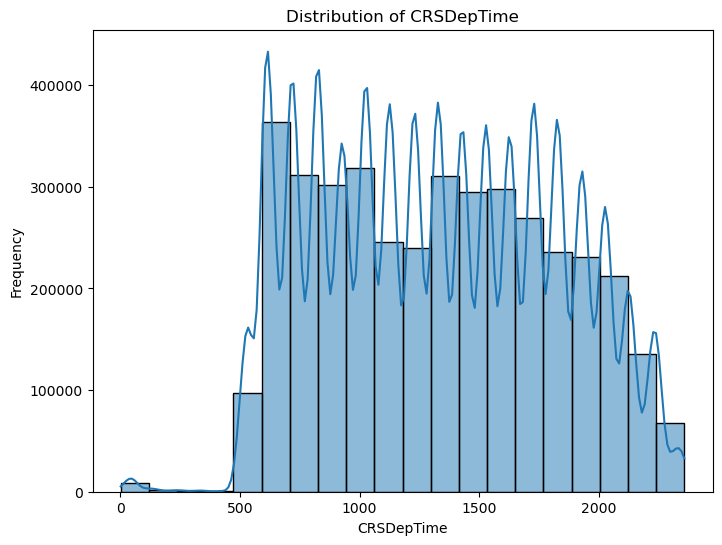

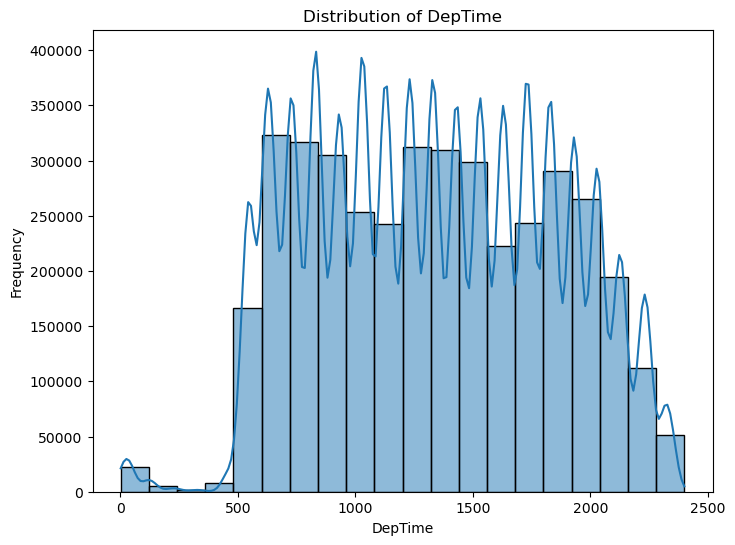

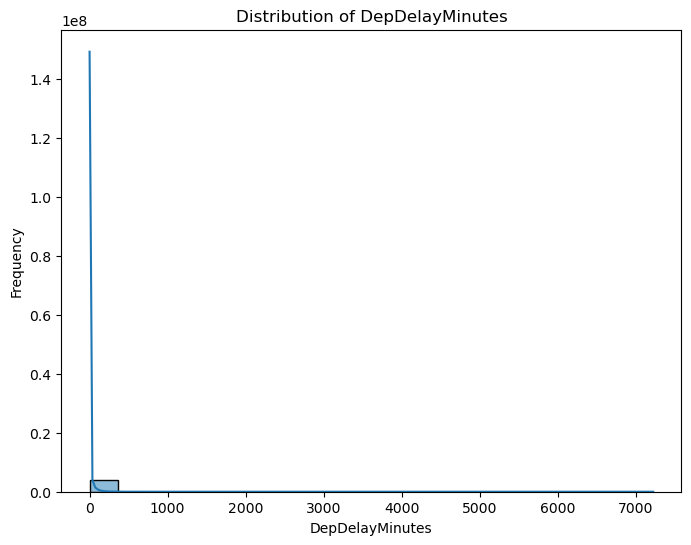

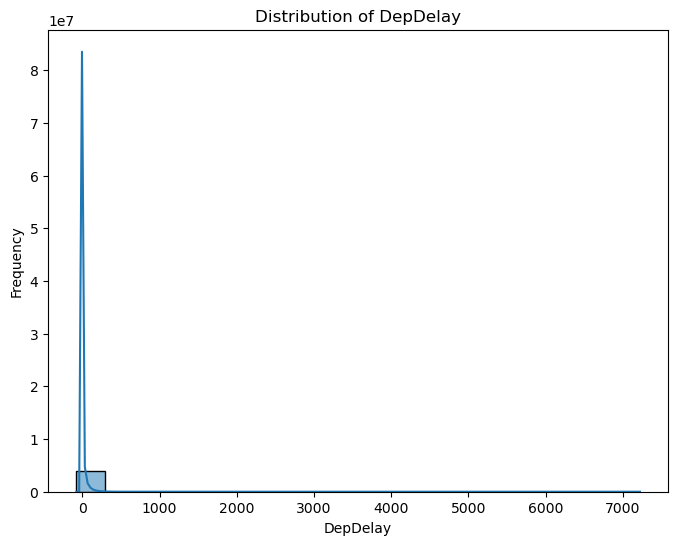

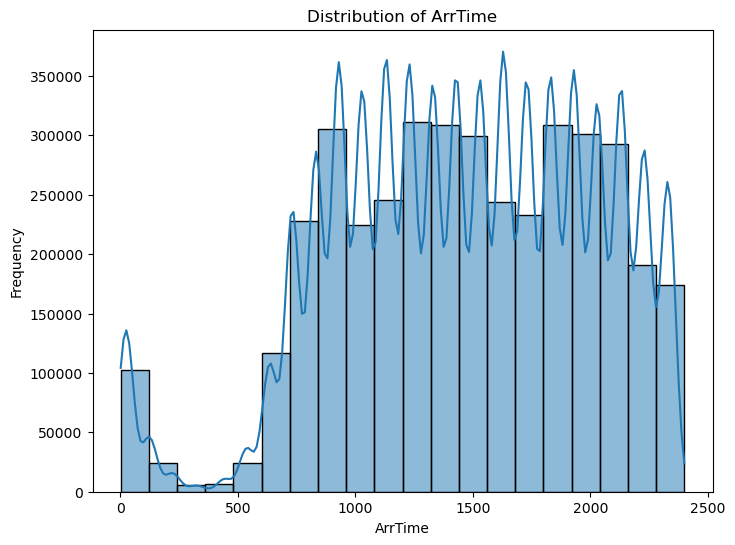

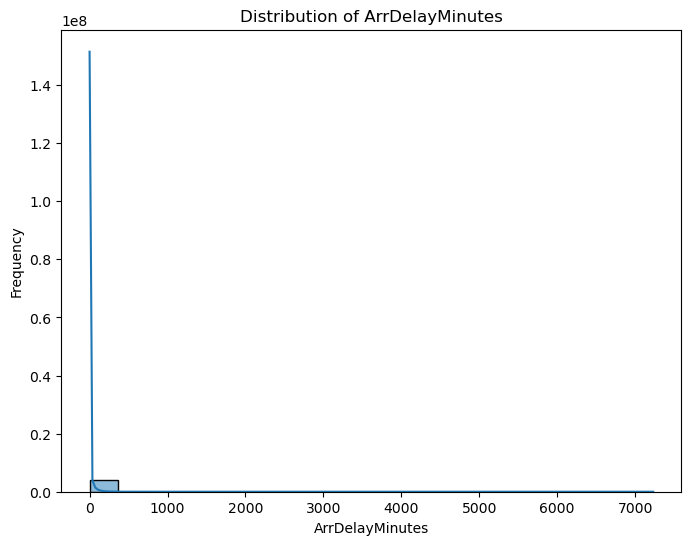

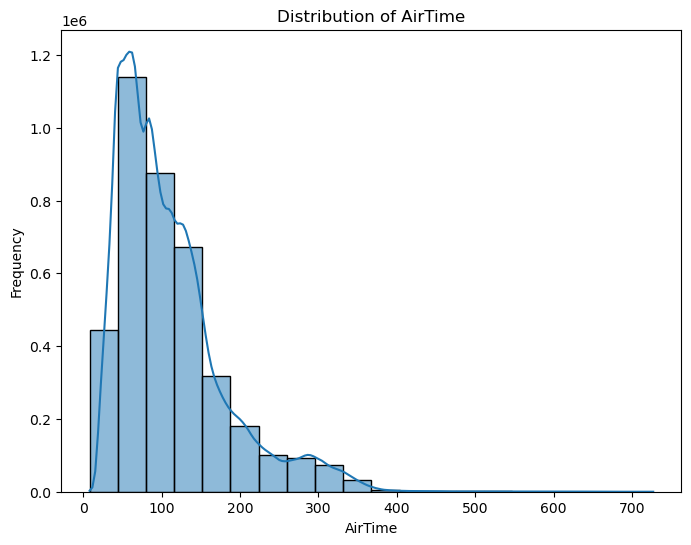

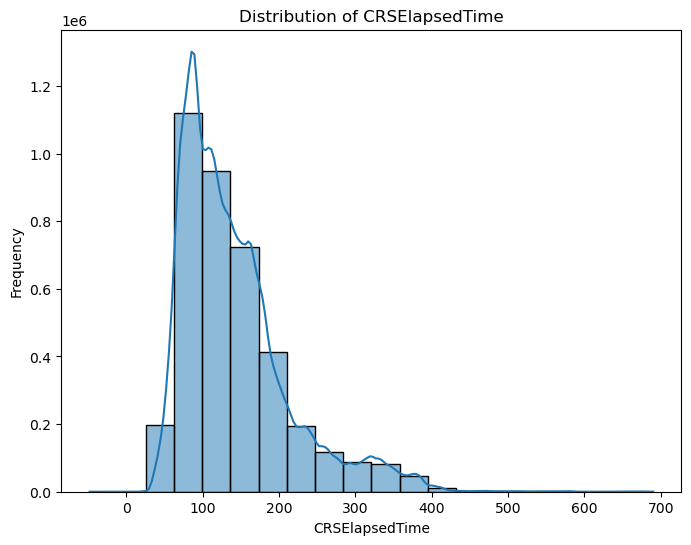

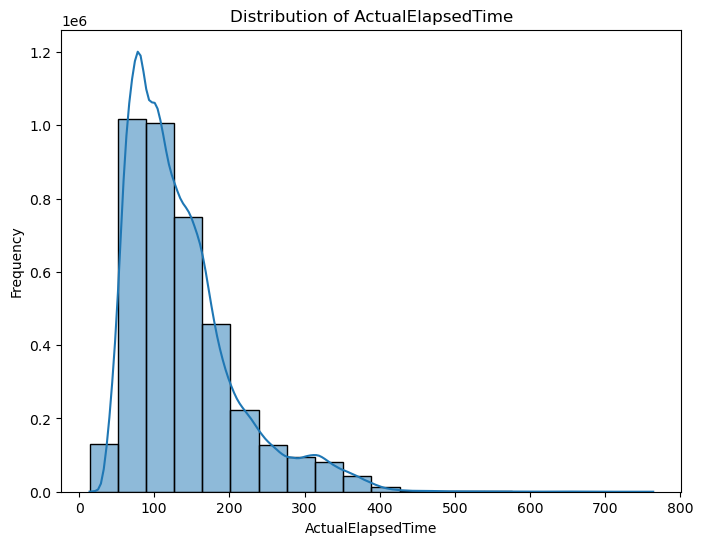

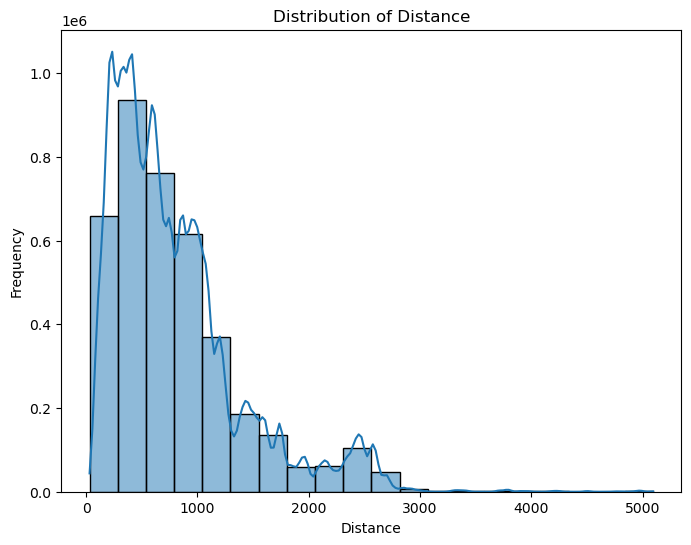

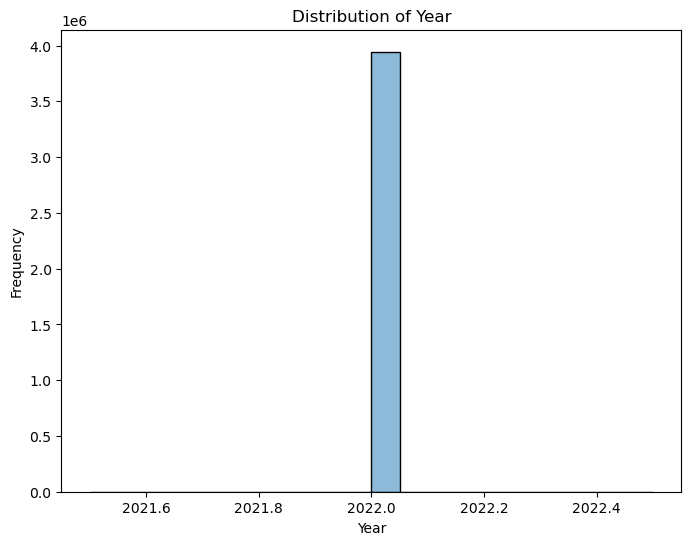

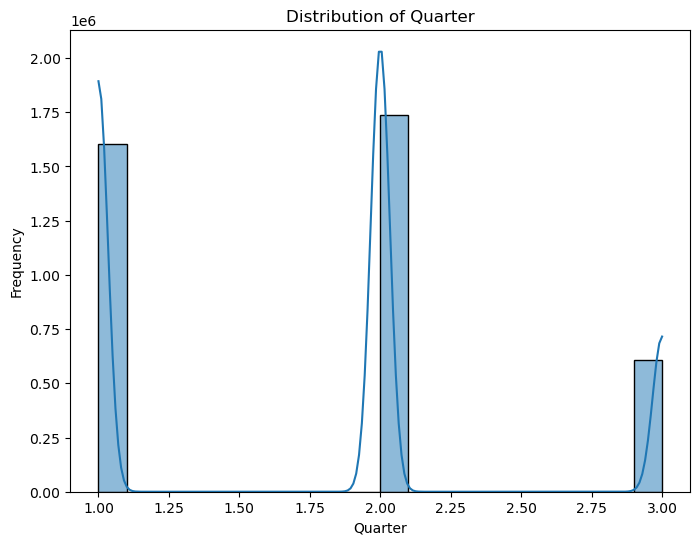

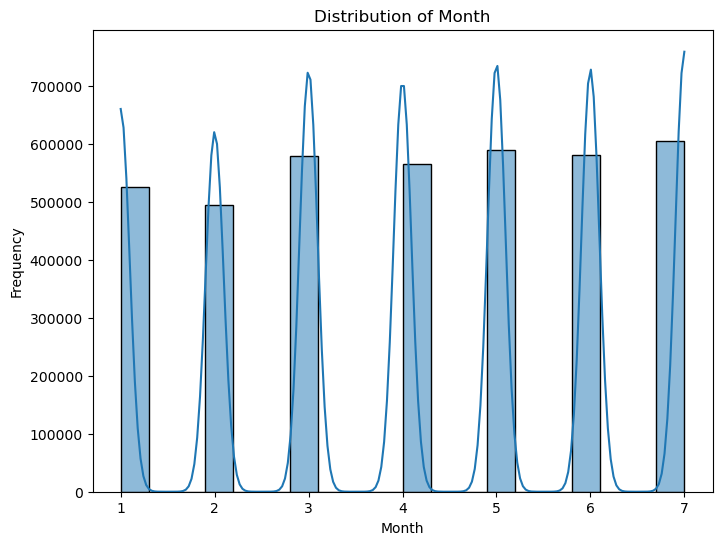

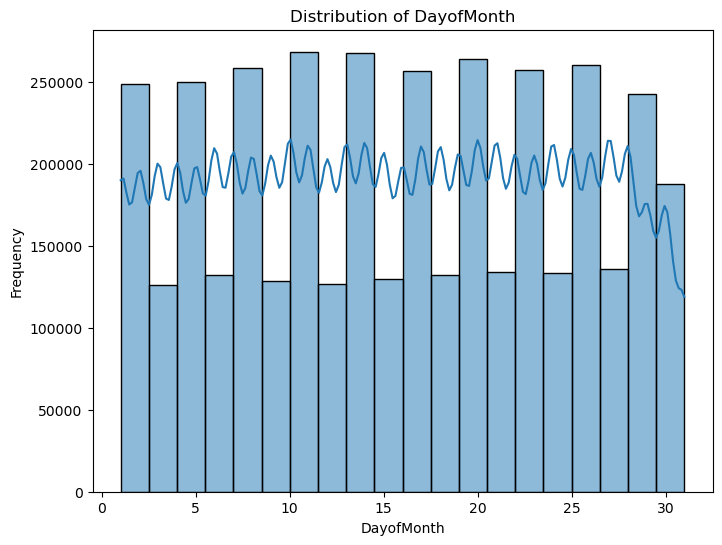

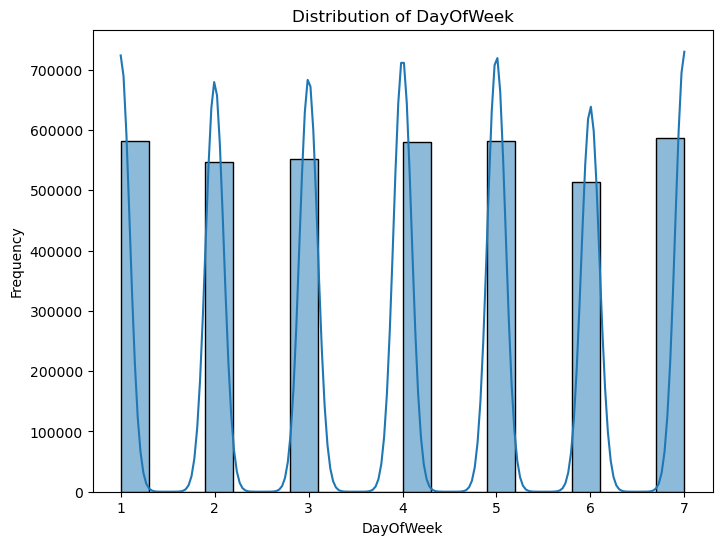

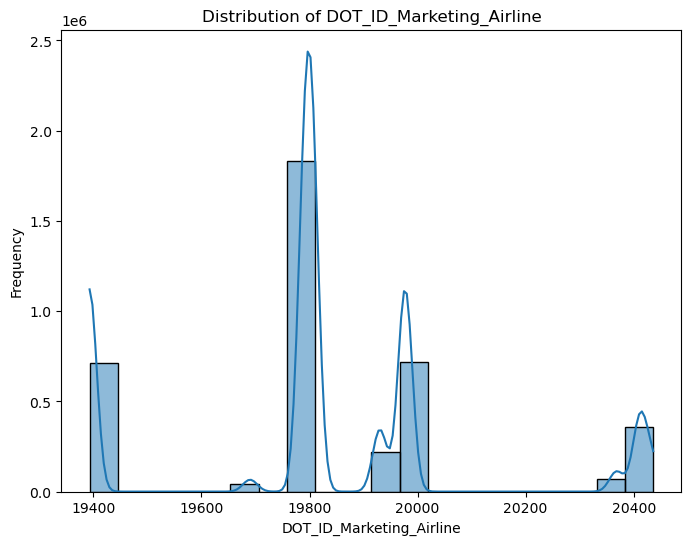

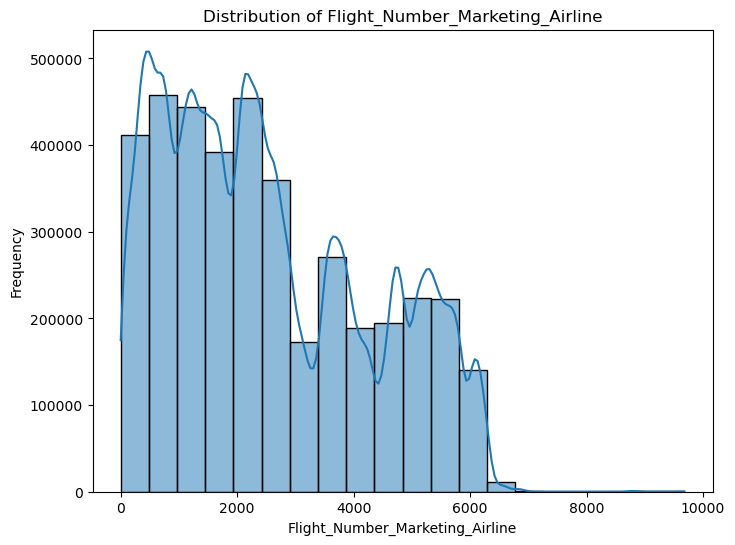

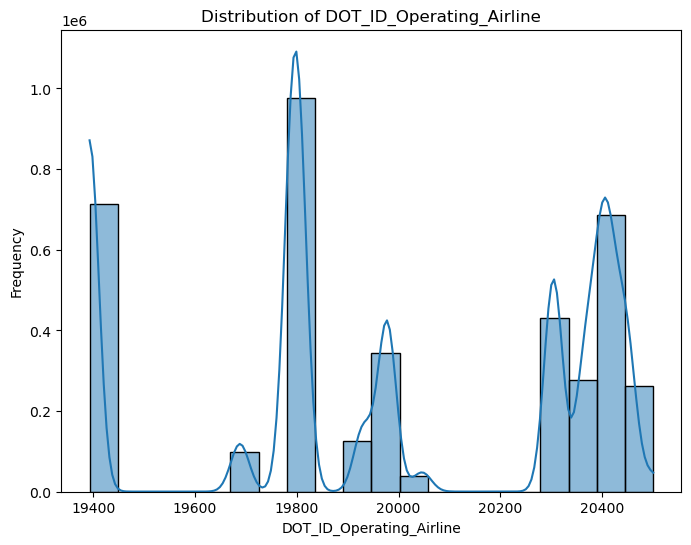

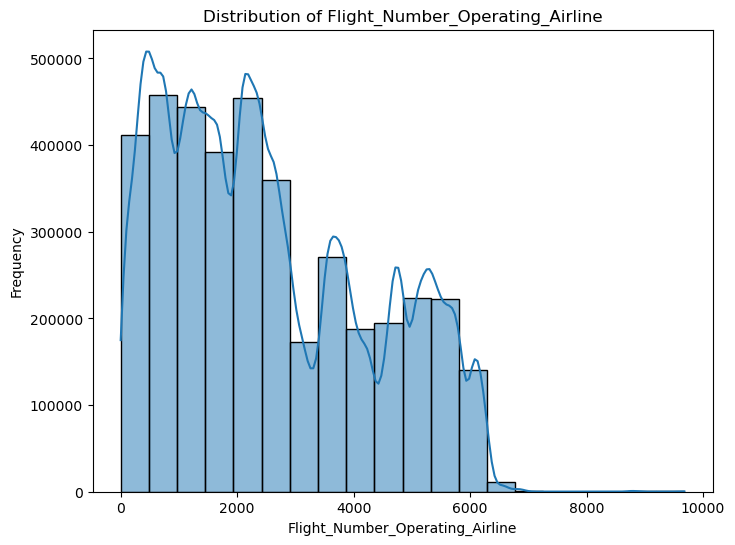

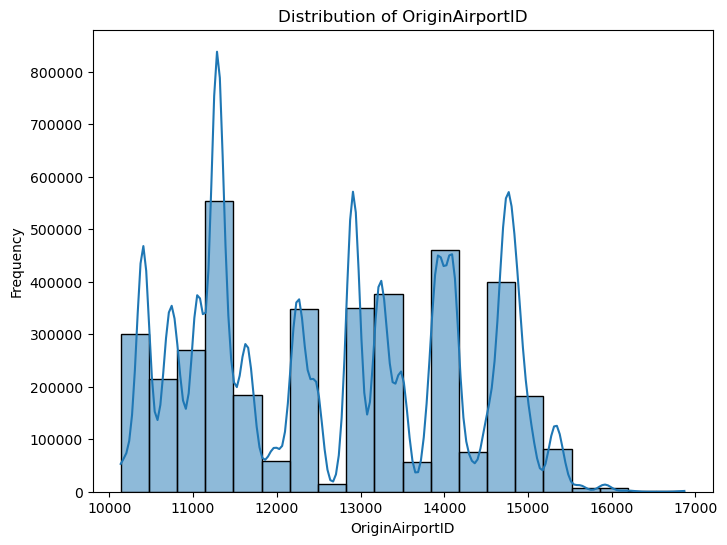

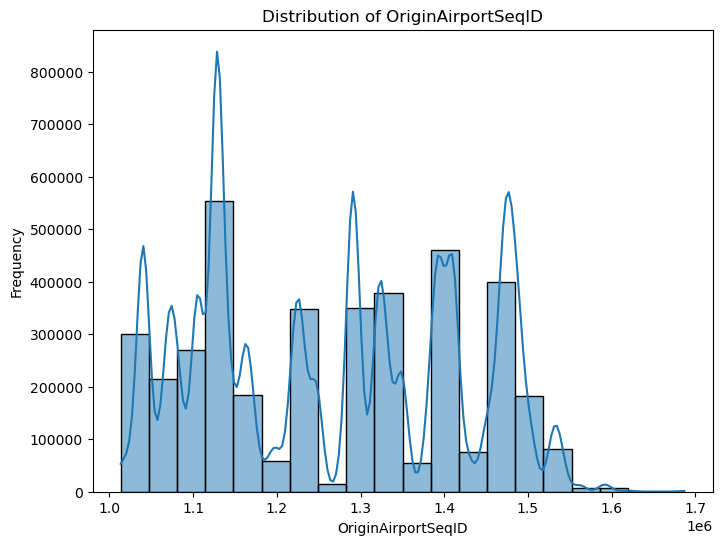

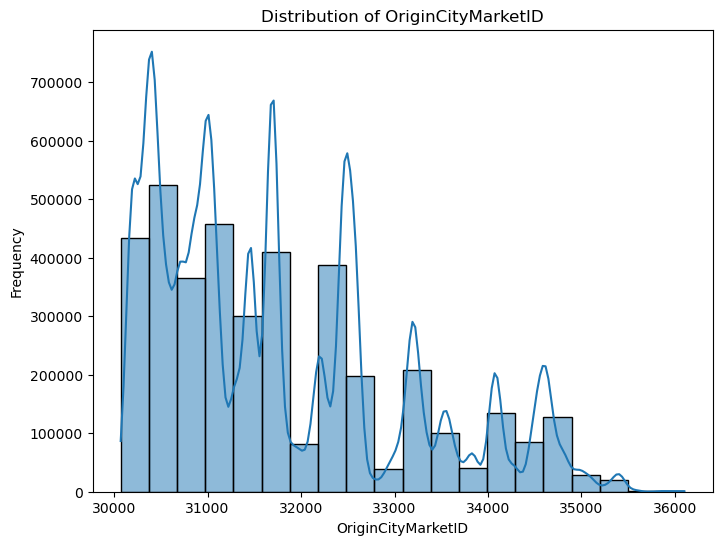

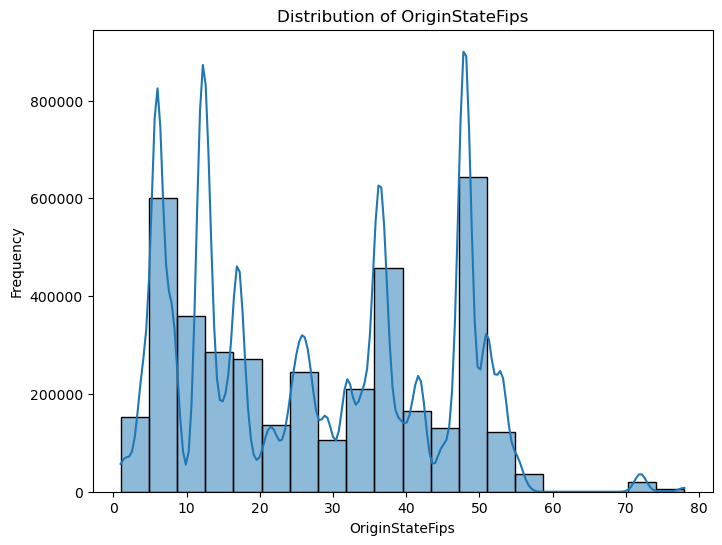

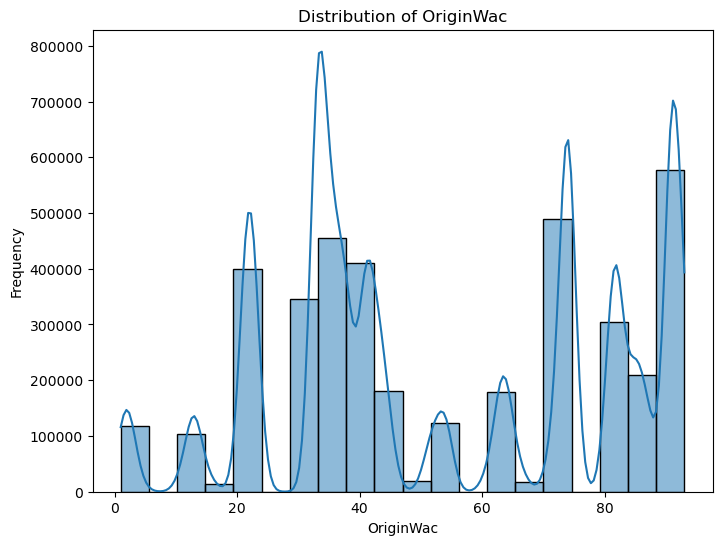

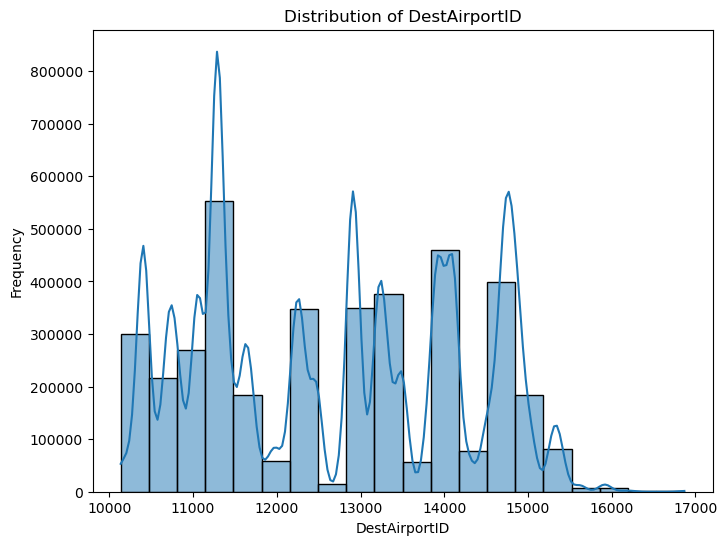

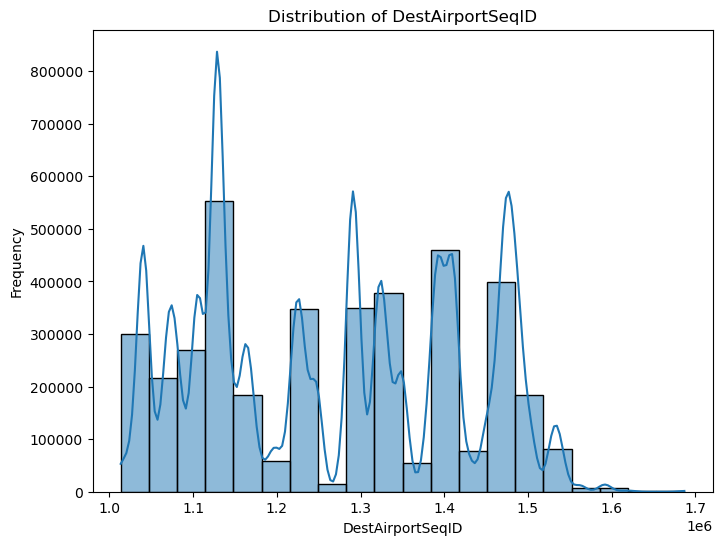

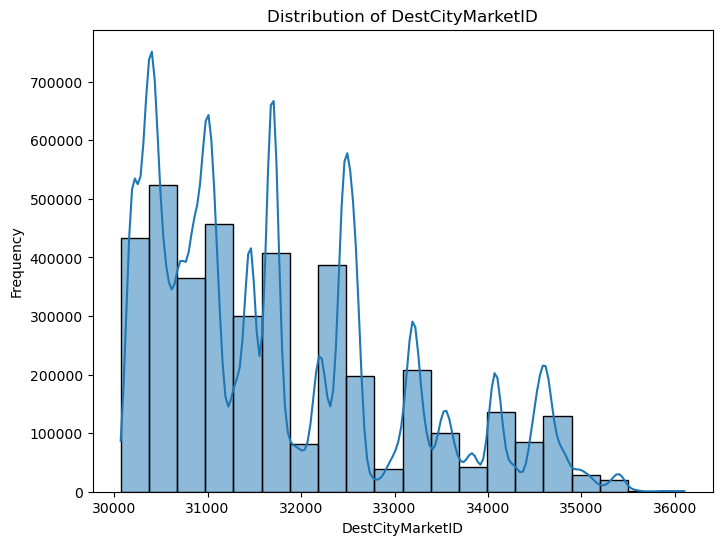

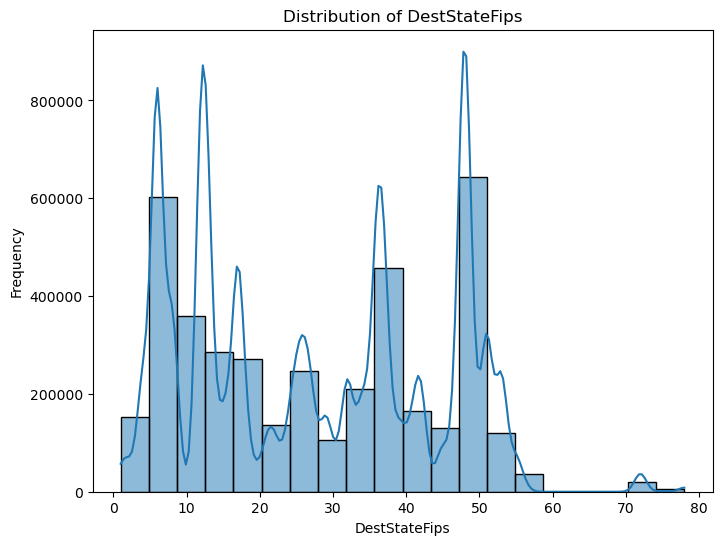

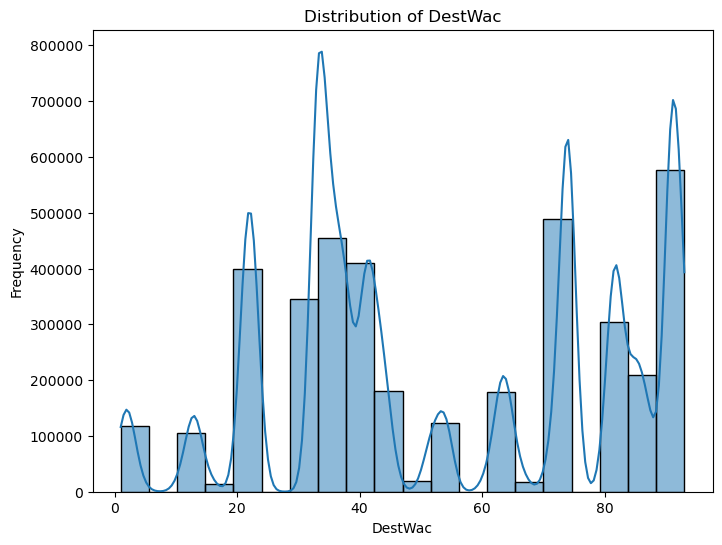

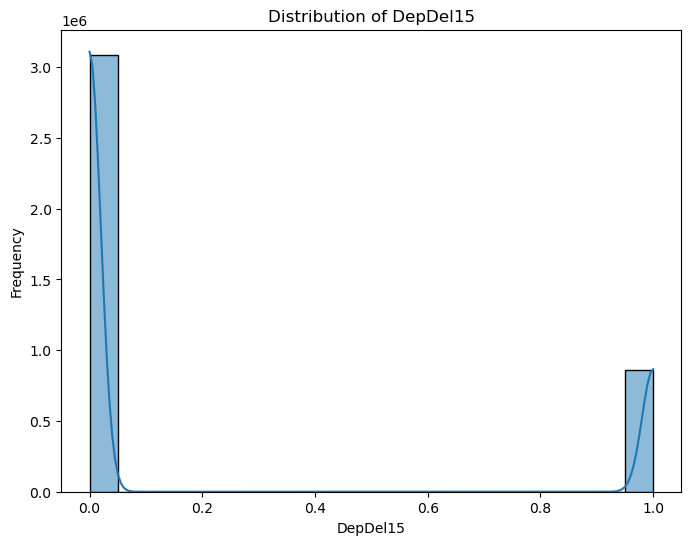

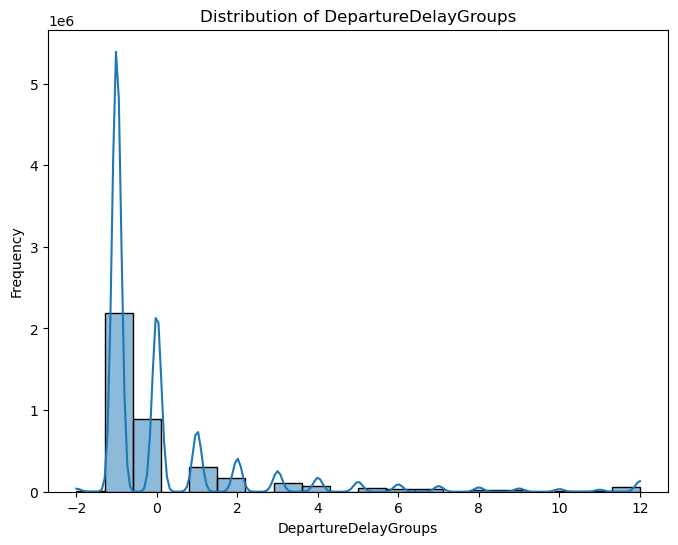

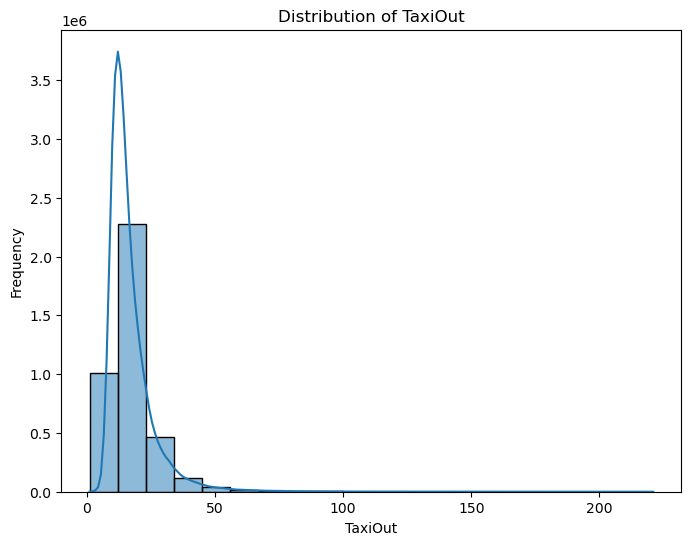

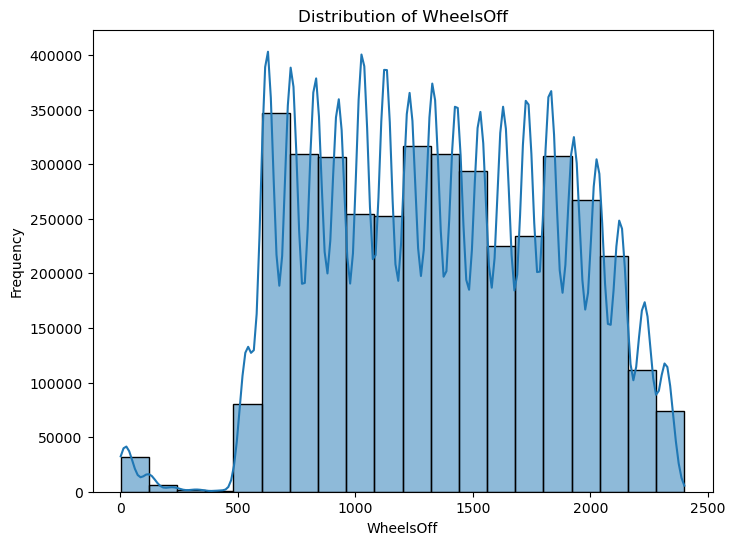

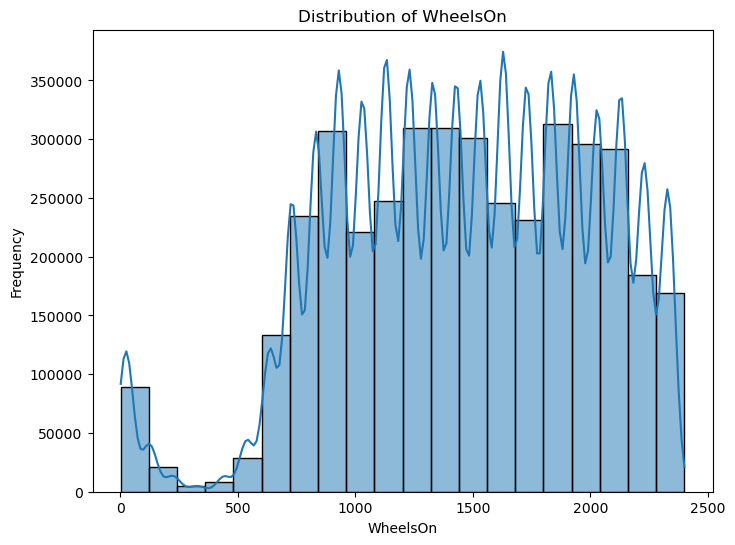

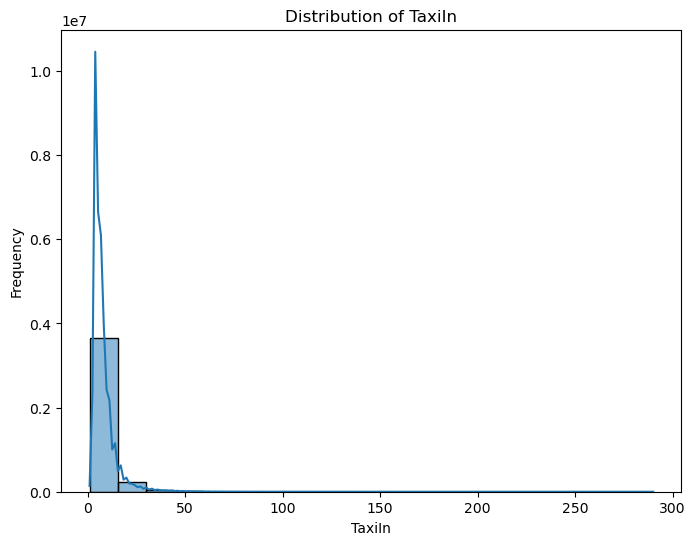

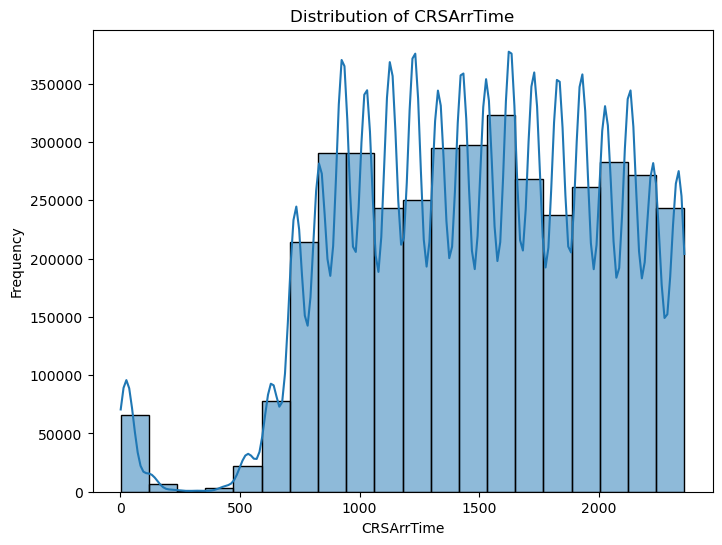

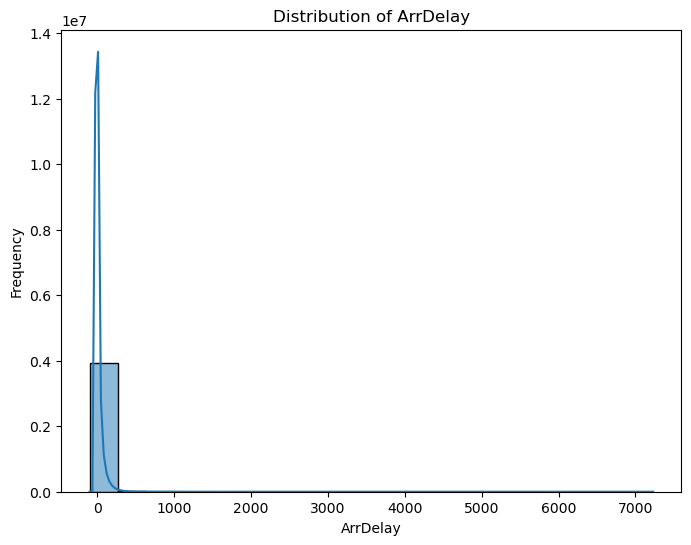

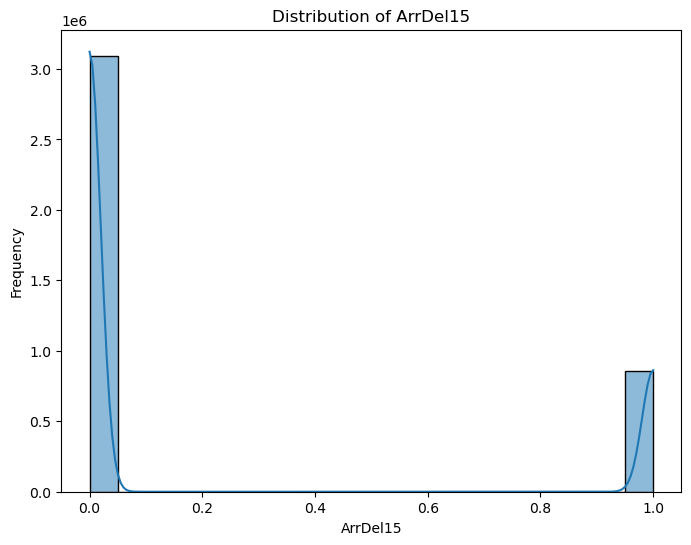

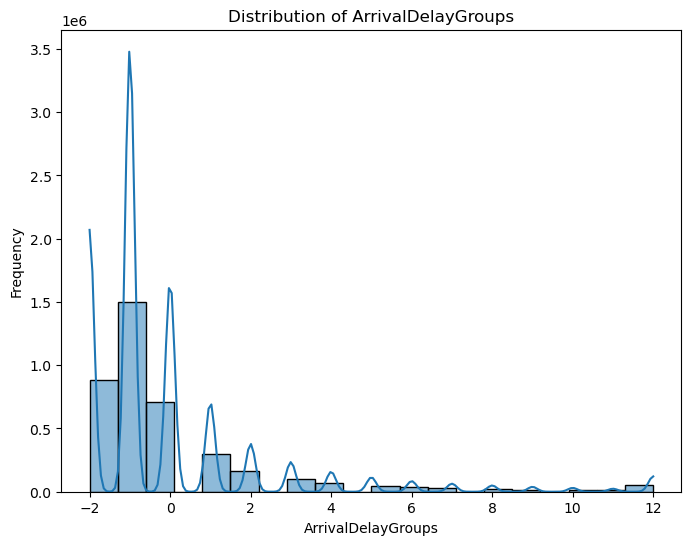

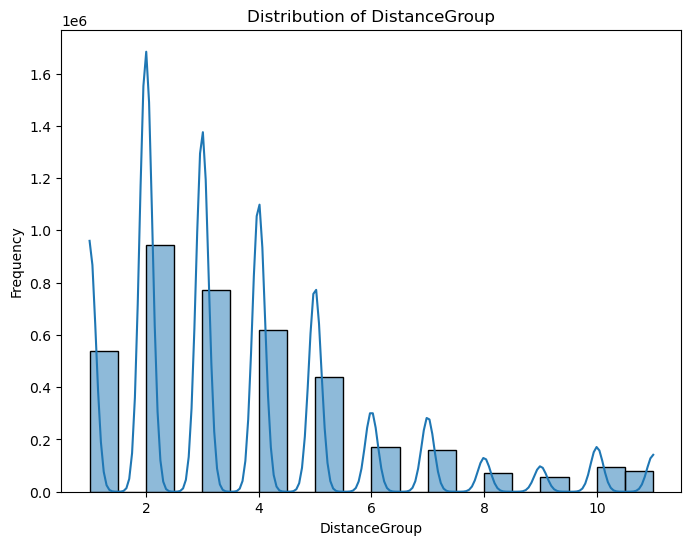

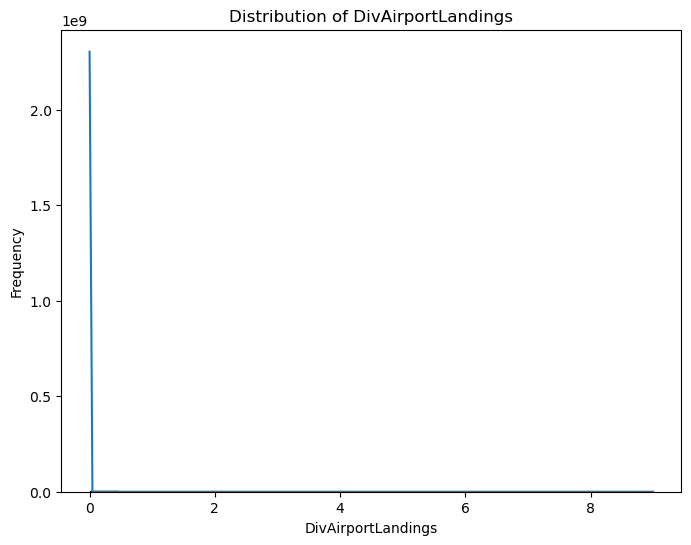

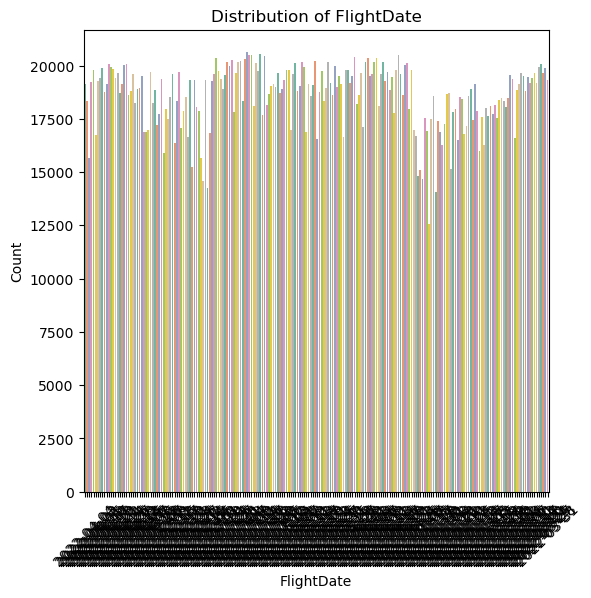

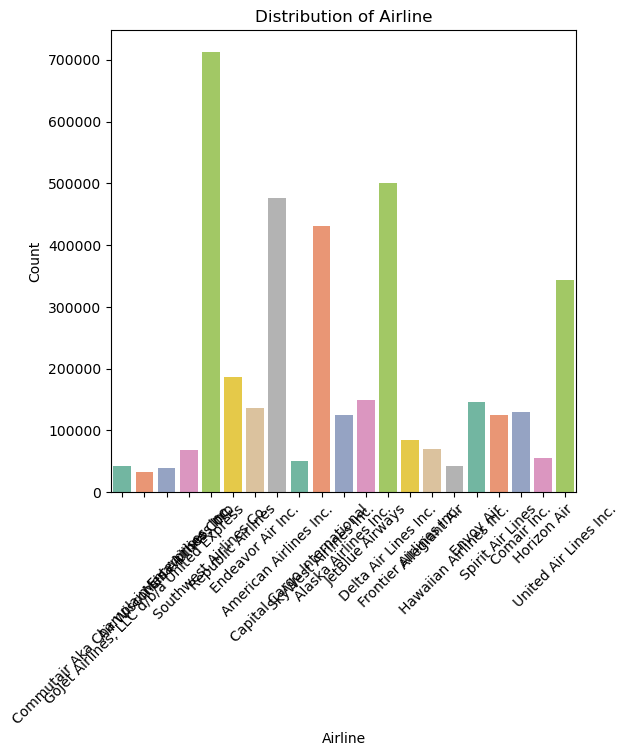

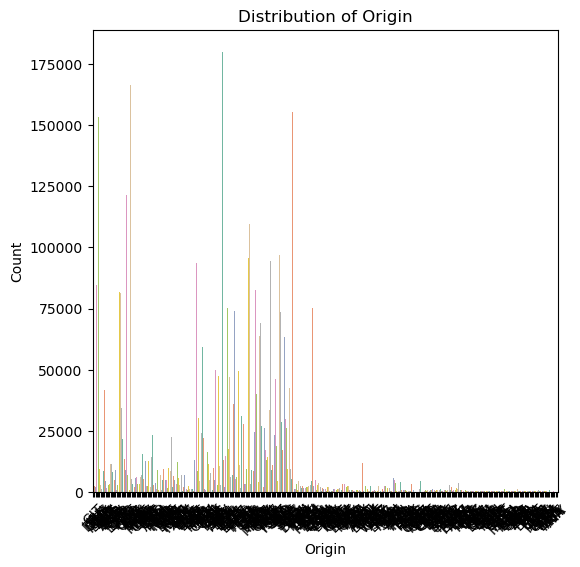

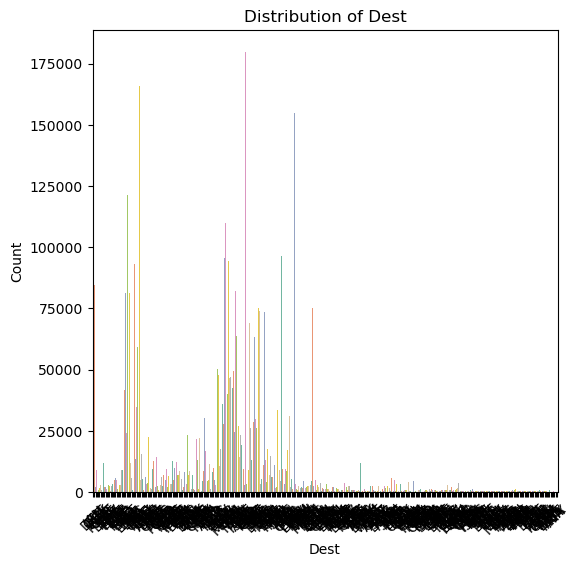

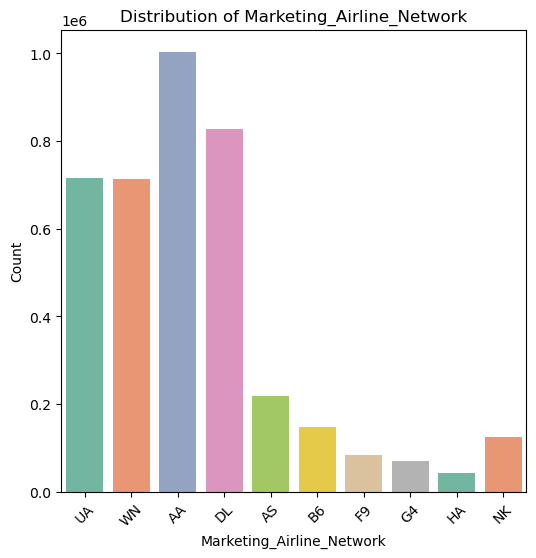

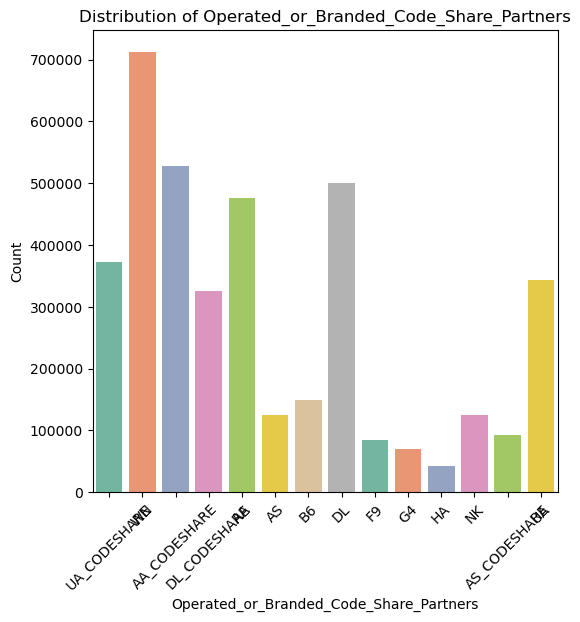

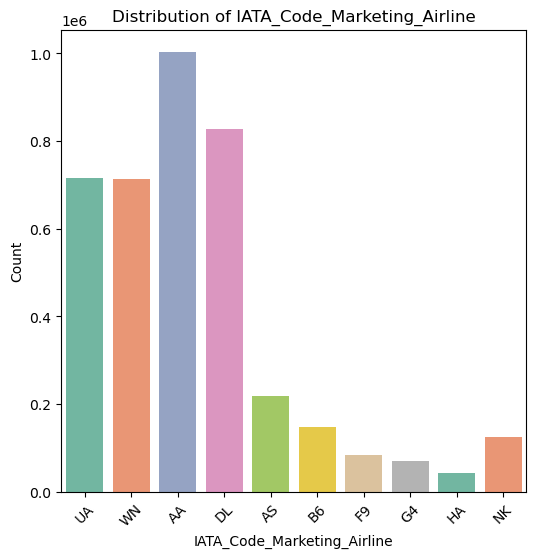

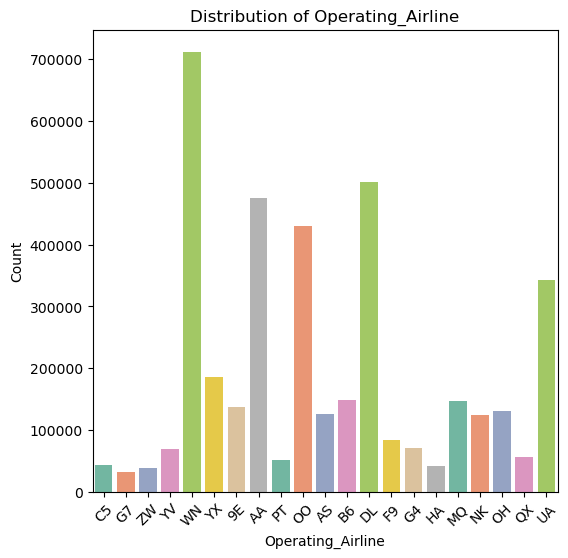

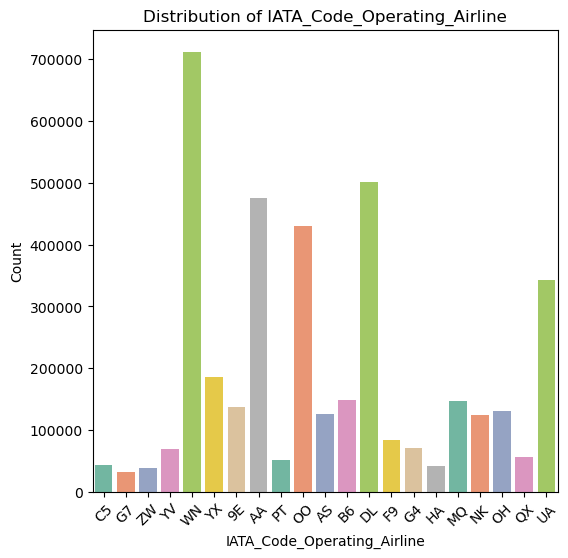

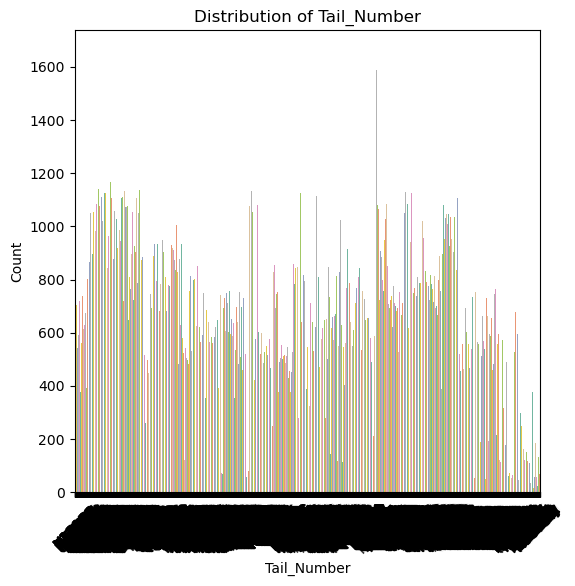

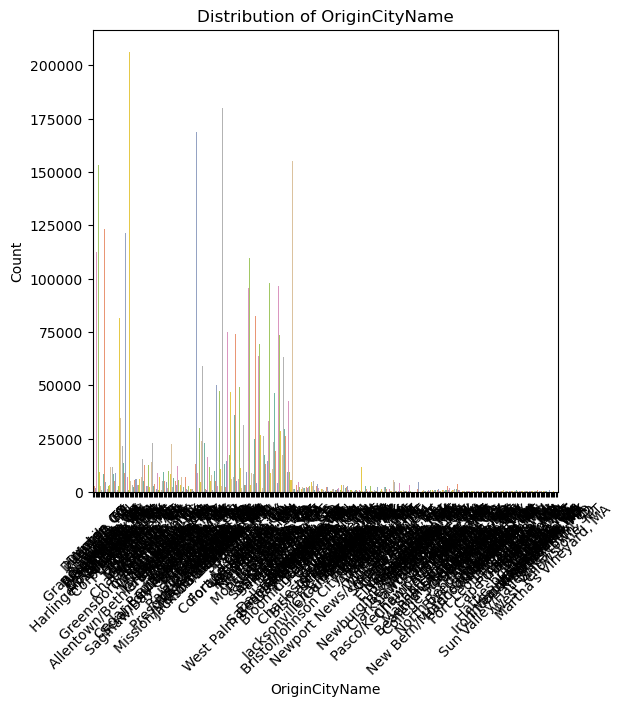

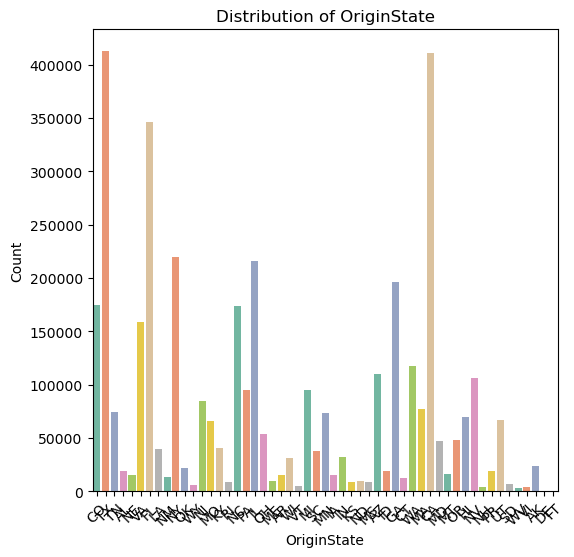

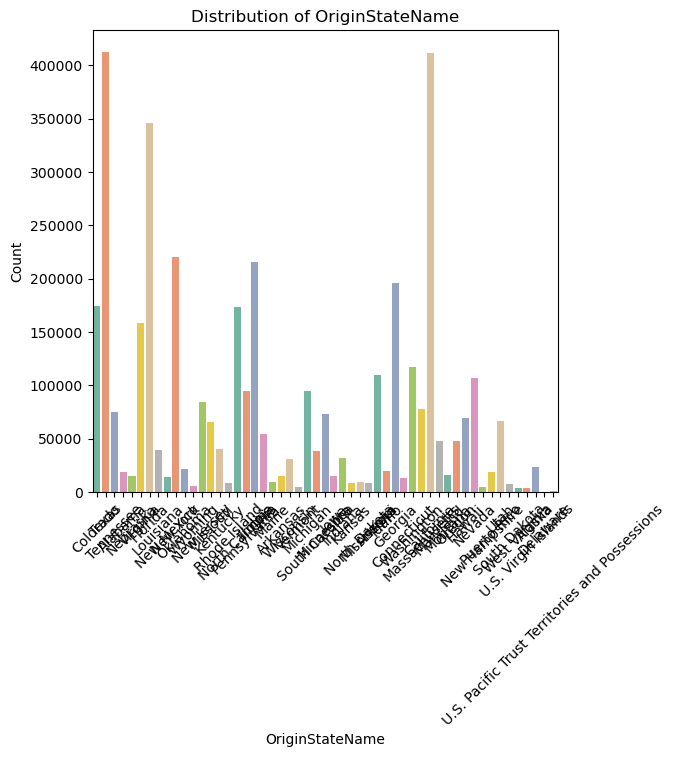

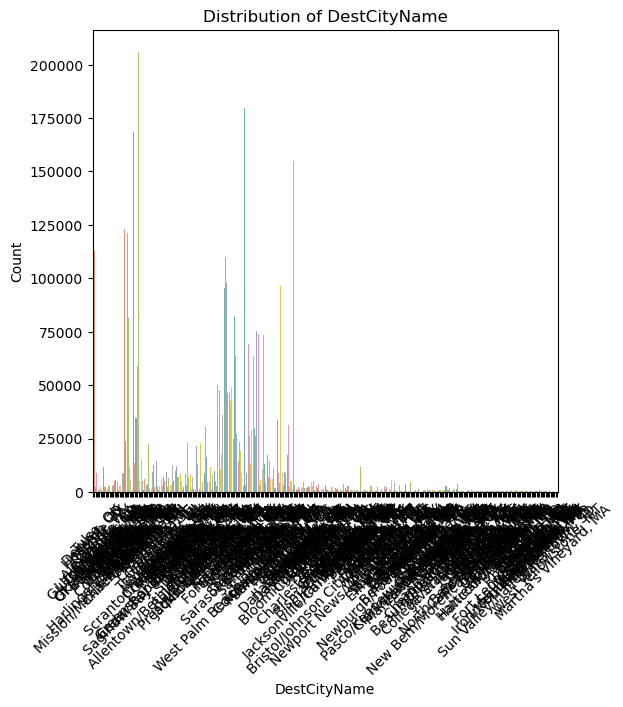

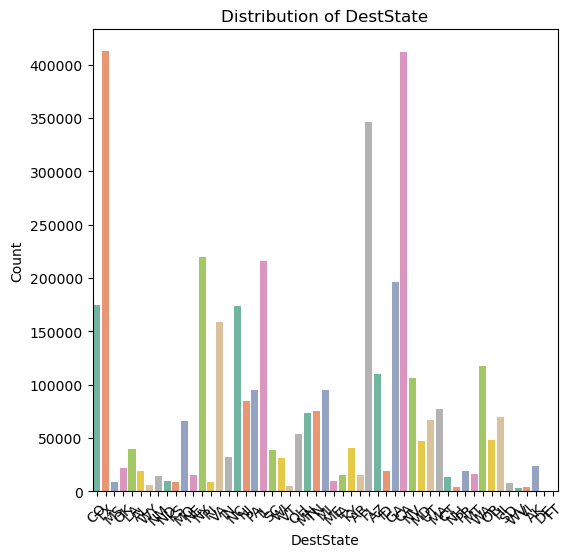

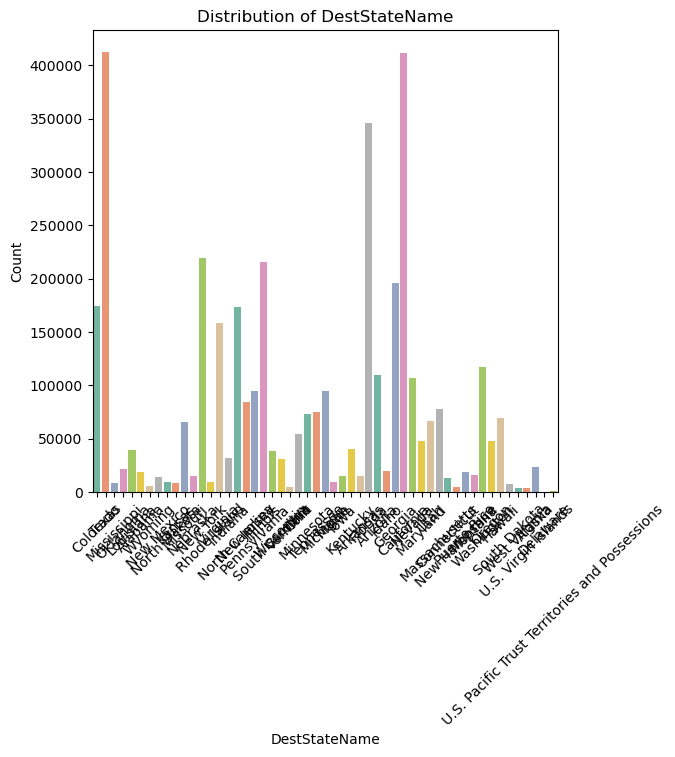

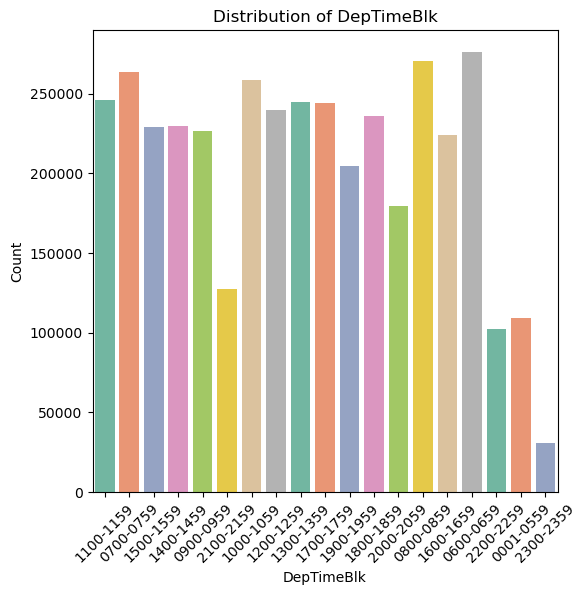

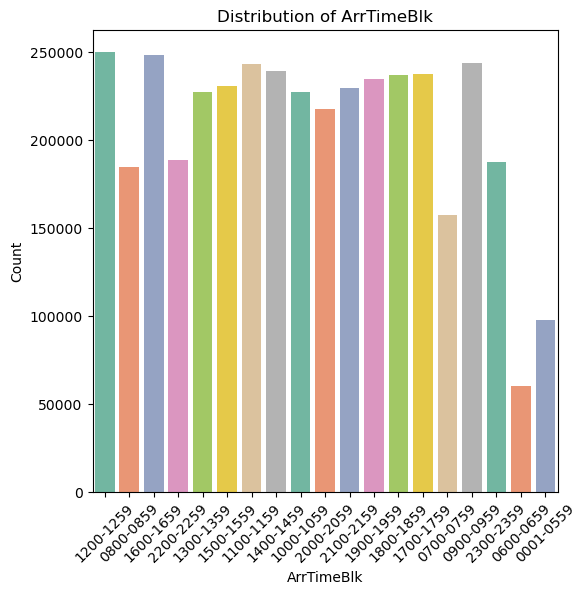

In [14]:
#
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_attribute_distribution(df):
    # Histograms for numerical attributes
    num_attributes = df.select_dtypes(include=['number']).columns
    for col in num_attributes:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Countplots for categorical attributes
    cat_attributes = df.select_dtypes(include=['object']).columns
    for col in cat_attributes:
        plt.figure(figsize=(6, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

visualize_attribute_distribution(df)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944916 entries, 0 to 4078315
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

### Exploratory Data Analysis

### What is the Average Arrival Delay by Airline?

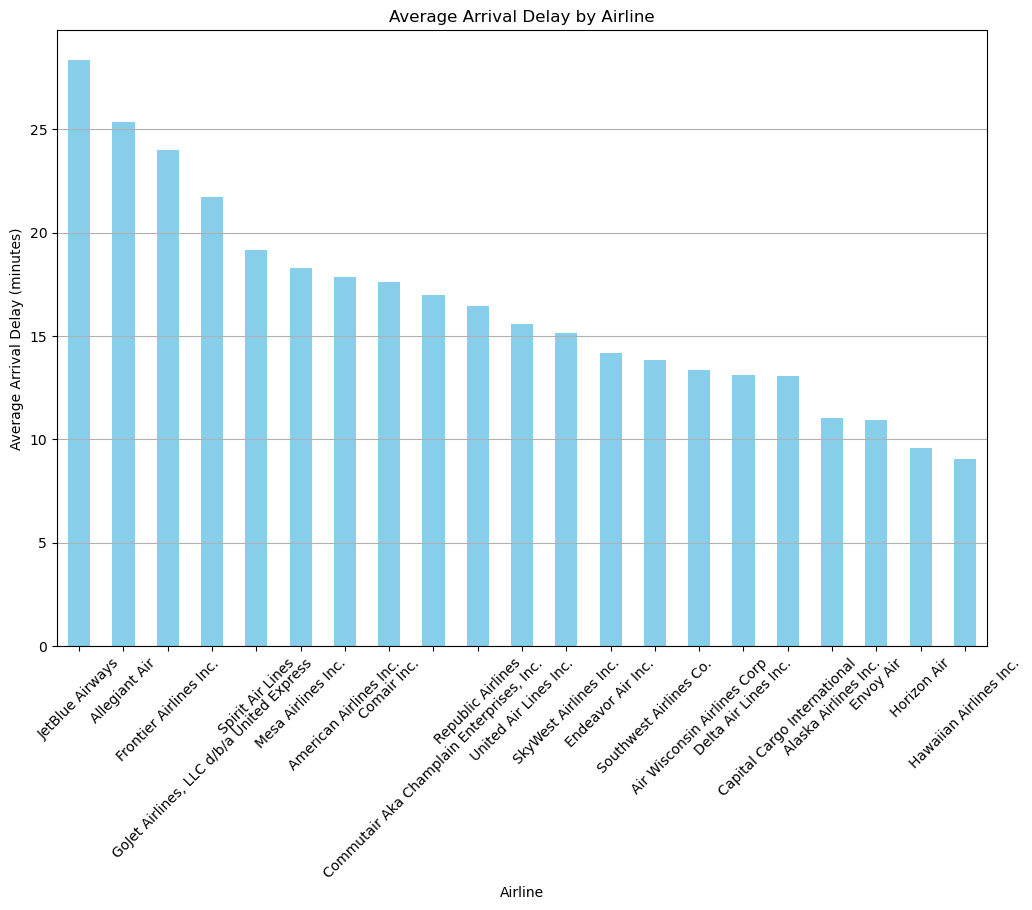

In [30]:
# Group by Airline and calculate average arrival delay
import matplotlib.pyplot as plt
avg_arrival_delay = df.groupby('Airline')['ArrDelayMinutes'].mean().sort_values(ascending=False)

# Bar plot of average arrival delay by airline
plt.figure(figsize=(12, 8))
avg_arrival_delay.plot(kind='bar', color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Airline')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Relationship Between Distance and Airtime

C:\Users\kashm\AppData\Local\Temp\ipykernel_29172\2901897679.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Distance'], df['AirTime'], alpha=0.5, cmap='viridis')


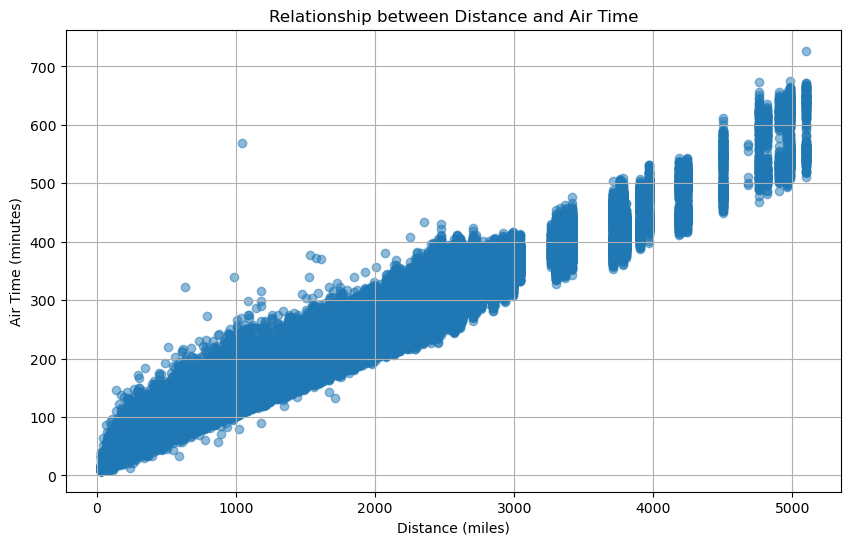

In [39]:
# Scatter plot of Distance vs AirTime
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['AirTime'], alpha=0.5, cmap='viridis')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.title('Relationship between Distance and Air Time')
plt.grid(True)
plt.show()

### The average arrival delay by airline in terms of both the average delay values and the count of flights per airline

In [33]:

import pandas as pd
import matplotlib.pyplot as plt

# Calculate average arrival delay and count of flights per airline
avg_arrival_delay = df.groupby('Airline')['ArrDelayMinutes'].mean().sort_values(ascending=False)
flight_counts = df['Airline'].value_counts()

# Combine average delay and flight count into a single DataFrame
summary_df = pd.DataFrame({'Average Arrival Delay (minutes)': avg_arrival_delay, 'Flight Count': flight_counts})

# Display the combined DataFrame
print(summary_df)

                                           Average Arrival Delay (minutes)  \
Air Wisconsin Airlines Corp                                      13.340409   
Alaska Airlines Inc.                                             11.026280   
Allegiant Air                                                    25.350068   
American Airlines Inc.                                           17.860139   
Capital Cargo International                                      13.050802   
Comair Inc.                                                      17.623038   
Commutair Aka Champlain Enterprises, Inc.                        17.008007   
Delta Air Lines Inc.                                             13.111550   
Endeavor Air Inc.                                                14.184149   
Envoy Air                                                        10.942435   
Frontier Airlines Inc.                                           23.980928   
GoJet Airlines, LLC d/b/a United Express                        

### Day of the Week Analysis

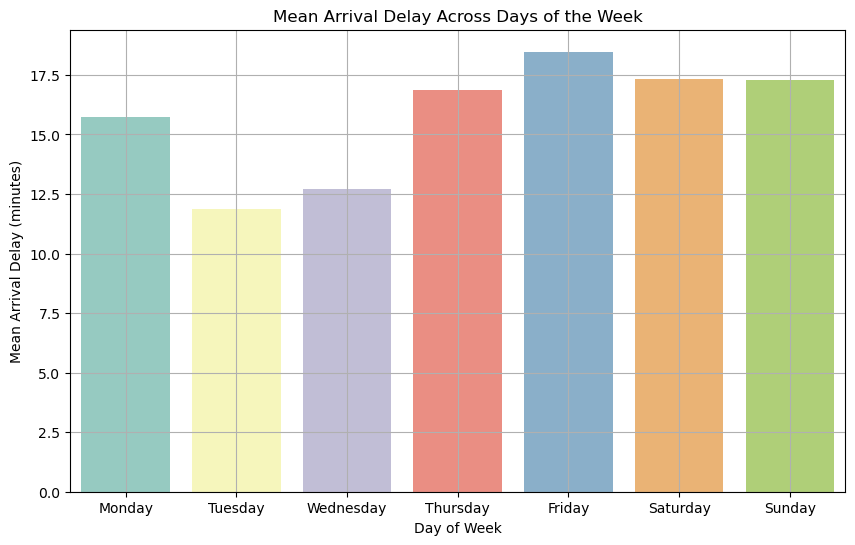

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Aggregate the mean arrival delay for each day of the week
mean_arr_delay = df.groupby('DayOfWeek')['ArrDelayMinutes'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='ArrDelayMinutes', data=mean_arr_delay, palette='Set3')
plt.xlabel('Day of Week')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay Across Days of the Week')
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


### Average ArrDelayMinutes by Origin and Dest airports


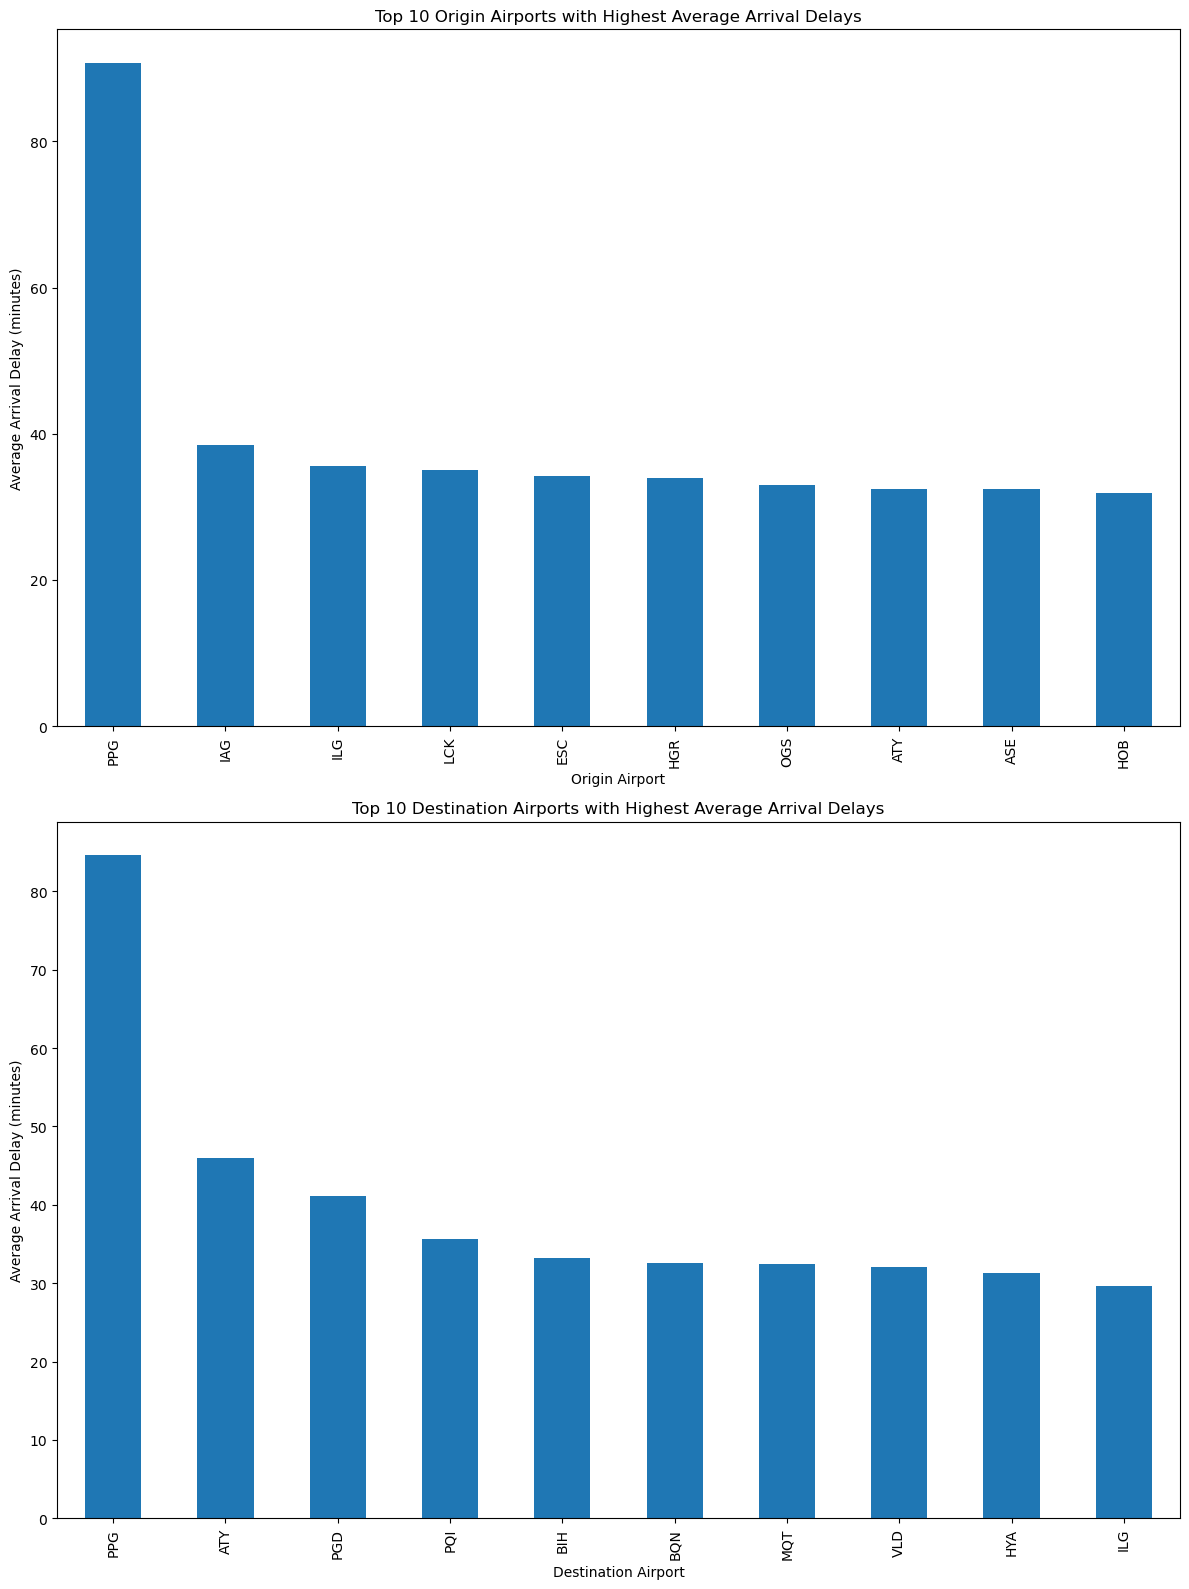

Top 10 Origin Airports with Highest Average Arrival Delays:
Origin
PPG    90.800000
IAG    38.517787
ILG    35.642857
LCK    35.099533
ESC    34.283654
HGR    33.970803
OGS    32.935622
ATY    32.500000
ASE    32.386552
HOB    31.917889
Name: ArrDelayMinutes, dtype: float64

Top 10 Destination Airports with Highest Average Arrival Delays:
Dest
PPG    84.680000
ATY    46.000000
PGD    41.145478
PQI    35.659509
BIH    33.184000
BQN    32.558621
MQT    32.427941
VLD    32.047203
HYA    31.296875
ILG    29.619048
Name: ArrDelayMinutes, dtype: float64


In [44]:
# For Origin airports
origin_delays = df.groupby('Origin')['ArrDelayMinutes'].mean().sort_values(ascending=False)
top_10_origin = origin_delays.head(10)

# For Destination airports
dest_delays = df.groupby('Dest')['ArrDelayMinutes'].mean().sort_values(ascending=False)
top_10_dest = dest_delays.head(10)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

top_10_origin.plot(kind='bar', ax=ax1)
ax1.set_title('Top 10 Origin Airports with Highest Average Arrival Delays')
ax1.set_xlabel('Origin Airport')
ax1.set_ylabel('Average Arrival Delay (minutes)')

top_10_dest.plot(kind='bar', ax=ax2)
ax2.set_title('Top 10 Destination Airports with Highest Average Arrival Delays')
ax2.set_xlabel('Destination Airport')
ax2.set_ylabel('Average Arrival Delay (minutes)')

plt.tight_layout()
plt.show()

print("Top 10 Origin Airports with Highest Average Arrival Delays:")
print(top_10_origin)
print("\nTop 10 Destination Airports with Highest Average Arrival Delays:")
print(top_10_dest)



Origin Airports:

The airport with the code PPG (Pago Pago International Airport in American Samoa) stands out significantly, with an average arrival delay of about 90.8 minutes for flights originating there.
The next highest delays are much lower, ranging from about 31.9 to 38.5 minutes.
Smaller, less frequented airports like IAG (Niagara Falls International Airport), ILG (New Castle Airport in Delaware), and LCK (Rickenbacker International Airport in Ohio) are among the top origins for delays.


Destination Airports:

PPG also tops the list as a destination, with an average arrival delay of 84.68 minutes.
ATY (Watertown Regional Airport in South Dakota) has the second-highest average delay at 46 minutes.
The range of delays for the top 10 destination airports is from about 29.6 to 84.7 minutes.

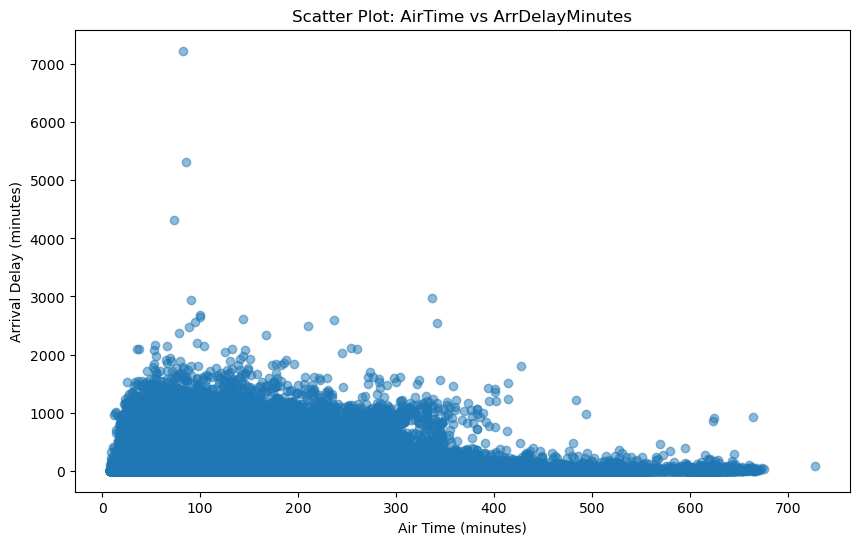

Correlation coefficient between AirTime and ArrDelayMinutes: 0.0202


In [45]:
# # Correlation between AirTime and ArrDelayMinutes

# # Calculate correlation coefficient
# correlation = df['AirTime'].corr(df['ArrDelayMinutes'])

# # Create scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['AirTime'], df['ArrDelayMinutes'], alpha=0.5)
# plt.title('Scatter Plot: AirTime vs ArrDelayMinutes')
# plt.xlabel('Air Time (minutes)')
# plt.ylabel('Arrival Delay (minutes)')
# plt.show()

# print(f"Correlation coefficient between AirTime and ArrDelayMinutes: {correlation:.4f}")

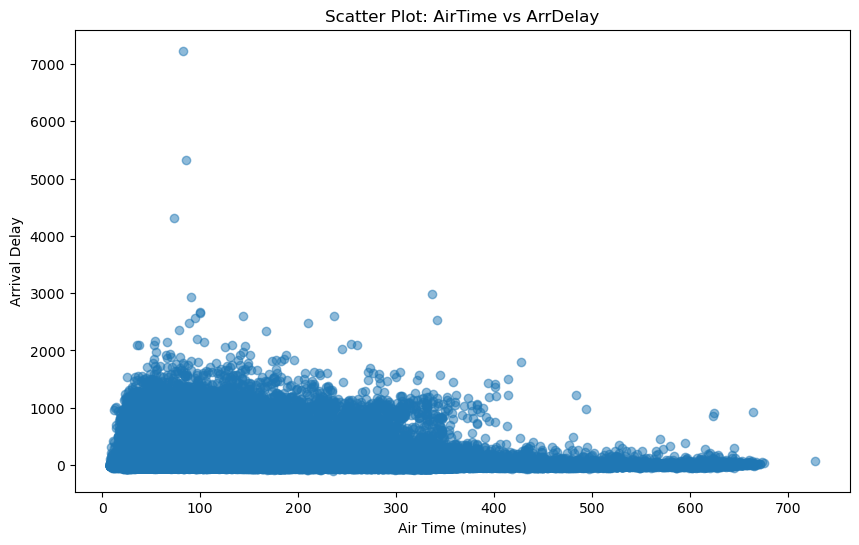

Correlation coefficient between AirTime and ArrDelay: 0.0148


In [47]:
# Correlation between AirTime and ArrDelay

# Calculate correlation coefficient
correlation = df['AirTime'].corr(df['ArrDelay'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AirTime'], df['ArrDelay'], alpha=0.5)
plt.title('Scatter Plot: AirTime vs ArrDelay')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Arrival Delay')
plt.show()

print(f"Correlation coefficient between AirTime and ArrDelay: {correlation:.4f}")

In [49]:
#Outliers
delay_threshold = 3000
delayed_flights = df[df['ArrDelay'] > delay_threshold]

# Displaying the rows where ArrDelay > 3000
delayed_flights

FlightDate            Airline Origin Dest  Cancelled  Diverted  \
1968891  2022-05-16  Republic Airlines    DCA  PWM      False     False   
1968895  2022-05-23  Republic Airlines    DCA  PWM      False     False   
2875543  2022-06-18          Envoy Air    DFW  MGM      False     False   

         CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  \
1968891        1710   1710.0           4320.0    4320.0  ...     1730.0   
1968895        1004   1027.0           7223.0    7223.0  ...     1101.0   
2875543        2105   1352.0           5327.0    5327.0  ...     1403.0   

         WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  \
1968891    1843.0     6.0        1851    4318.0       1.0                12.0   
1968895    1224.0     6.0        1158    7232.0       1.0                12.0   
2875543    1529.0     9.0        2254    5324.0       1.0                12.0   

         ArrTimeBlk  DistanceGroup  DivAirportLandings  
1968891   1800-1859              2                   0  
1968895   1100-1159              2                   0  
2875543   2200-2259              3                   0  

[3 rows x 61 columns]

In [7]:
# After throughly understanding the data, selecting the relevant columns
columns = ['FlightDate', 'Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth','Year', 'ArrDelay']
data = df[columns]

In [8]:
data

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078308  2022-03-31                          Republic Airlines    EYW  EWR   
4078309  2022-03-31                          Republic Airlines    CLE  EWR   
4078310  2022-03-31                          Republic Airlines    IAD  PIT   
4078312  2022-03-19                          Republic Airlines    EWR  MEM   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  
0              1133        1245      4           4  2022     -17.0  
1               732         849      4           4  2022      -1.0  
2              1529        1639      4           4  2022      -3.0  
3              1435        1605      4           4  2022     -18.0  
4              1135        1245      4           4  2022       6.0  
...             ...         ...    ...         ...   ...       ...  
4078308        1617        1929      3          31  2022     207.0  
4078309        1418        1609      3          31  2022     201.0  
4078310        1750        1901      3          31  2022     180.0  
4078312        2035        2237      3          19  2022     135.0  
4078315        1700        1838      3           8  2022     381.0  

[3944916 rows x 10 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944916 entries, 0 to 4078315
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   FlightDate  object 
 1   Airline     object 
 2   Origin      object 
 3   Dest        object 
 4   CRSDepTime  int64  
 5   CRSArrTime  int64  
 6   Month       int64  
 7   DayofMonth  int64  
 8   Year        int64  
 9   ArrDelay    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 331.1+ MB


## Selection for the target column

### Since the prediction is based on arrival delay, I have considered that if the arrival delay is greater than 15 minutes, the flight is considered delayed; otherwise, it is considered on time.

In [9]:
data['Delayed'] = data['ArrDelay'].apply(lambda x: 1 if x > 15 else 0)

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\2575214444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delayed'] = data['ArrDelay'].apply(lambda x: 1 if x > 15 else 0)


In [10]:
data

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078308  2022-03-31                          Republic Airlines    EYW  EWR   
4078309  2022-03-31                          Republic Airlines    CLE  EWR   
4078310  2022-03-31                          Republic Airlines    IAD  PIT   
4078312  2022-03-19                          Republic Airlines    EWR  MEM   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  
0              1133        1245      4           4  2022     -17.0        0  
1               732         849      4           4  2022      -1.0        0  
2              1529        1639      4           4  2022      -3.0        0  
3              1435        1605      4           4  2022     -18.0        0  
4              1135        1245      4           4  2022       6.0        0  
...             ...         ...    ...         ...   ...       ...      ...  
4078308        1617        1929      3          31  2022     207.0        1  
4078309        1418        1609      3          31  2022     201.0        1  
4078310        1750        1901      3          31  2022     180.0        1  
4078312        2035        2237      3          19  2022     135.0        1  
4078315        1700        1838      3           8  2022     381.0        1  

[3944916 rows x 11 columns]

In [11]:
data['Airline'].unique()

array(['Commutair Aka Champlain Enterprises, Inc.',
       'GoJet Airlines, LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp', 'Mesa Airlines Inc.',
       'Southwest Airlines Co.', 'Republic Airlines', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Capital Cargo International',
       'SkyWest Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'Comair Inc.', 'Horizon Air', 'United Air Lines Inc.'],
      dtype=object)

### Checking if the data is imbalance

In [12]:
# checking if the data is imbalance --> Count occurrences of each class label
class_counts = data['Delayed'].value_counts()
print(class_counts)

0    3118787
1     826129
Name: Delayed, dtype: int64


### As the data is highly imbalance, we need to perform sampling techniques to handle these imbalance

## Data pre-processing & Feature Engineering 

In [13]:
data.isna().sum()

FlightDate    0
Airline       0
Origin        0
Dest          0
CRSDepTime    0
CRSArrTime    0
Month         0
DayofMonth    0
Year          0
ArrDelay      0
Delayed       0
dtype: int64

In [14]:
data.corr()

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


CRSDepTime  CRSArrTime     Month  DayofMonth  Year  ArrDelay  \
CRSDepTime    1.000000    0.685775  0.003383   -0.000065   NaN  0.101063   
CRSArrTime    0.685775    1.000000 -0.016050   -0.001802   NaN  0.080256   
Month         0.003383   -0.016050  1.000000    0.005564   NaN  0.035812   
DayofMonth   -0.000065   -0.001802  0.005564    1.000000   NaN -0.012976   
Year               NaN         NaN       NaN         NaN   NaN       NaN   
ArrDelay      0.101063    0.080256  0.035812   -0.012976   NaN  1.000000   
Delayed       0.158097    0.126539  0.034085   -0.016584   NaN  0.580891   

             Delayed  
CRSDepTime  0.158097  
CRSArrTime  0.126539  
Month       0.034085  
DayofMonth -0.016584  
Year             NaN  
ArrDelay    0.580891  
Delayed     1.000000

### As the year has a constant value and no correlation with other columns in the data, I have dropped the 'Year' column from my final model.

In [15]:
data

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078308  2022-03-31                          Republic Airlines    EYW  EWR   
4078309  2022-03-31                          Republic Airlines    CLE  EWR   
4078310  2022-03-31                          Republic Airlines    IAD  PIT   
4078312  2022-03-19                          Republic Airlines    EWR  MEM   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  
0              1133        1245      4           4  2022     -17.0        0  
1               732         849      4           4  2022      -1.0        0  
2              1529        1639      4           4  2022      -3.0        0  
3              1435        1605      4           4  2022     -18.0        0  
4              1135        1245      4           4  2022       6.0        0  
...             ...         ...    ...         ...   ...       ...      ...  
4078308        1617        1929      3          31  2022     207.0        1  
4078309        1418        1609      3          31  2022     201.0        1  
4078310        1750        1901      3          31  2022     180.0        1  
4078312        2035        2237      3          19  2022     135.0        1  
4078315        1700        1838      3           8  2022     381.0        1  

[3944916 rows x 11 columns]

### Converting FlightDate to datetime format

In [16]:
# Convert FlightDate to datetime format
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\3774511103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FlightDate'] = pd.to_datetime(data['FlightDate'])


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944916 entries, 0 to 4078315
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   FlightDate  datetime64[ns]
 1   Airline     object        
 2   Origin      object        
 3   Dest        object        
 4   CRSDepTime  int64         
 5   CRSArrTime  int64         
 6   Month       int64         
 7   DayofMonth  int64         
 8   Year        int64         
 9   ArrDelay    float64       
 10  Delayed     int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 361.2+ MB


In [18]:
data

FlightDate                                    Airline Origin Dest  \
0       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...            ...                                        ...    ...  ...   
4078308 2022-03-31                          Republic Airlines    EYW  EWR   
4078309 2022-03-31                          Republic Airlines    CLE  EWR   
4078310 2022-03-31                          Republic Airlines    IAD  PIT   
4078312 2022-03-19                          Republic Airlines    EWR  MEM   
4078315 2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  
0              1133        1245      4           4  2022     -17.0        0  
1               732         849      4           4  2022      -1.0        0  
2              1529        1639      4           4  2022      -3.0        0  
3              1435        1605      4           4  2022     -18.0        0  
4              1135        1245      4           4  2022       6.0        0  
...             ...         ...    ...         ...   ...       ...      ...  
4078308        1617        1929      3          31  2022     207.0        1  
4078309        1418        1609      3          31  2022     201.0        1  
4078310        1750        1901      3          31  2022     180.0        1  
4078312        2035        2237      3          19  2022     135.0        1  
4078315        1700        1838      3           8  2022     381.0        1  

[3944916 rows x 11 columns]

### Creating some new features

### 'is_weekend' feature

In [19]:
# Create 'is_weekend' feature
# data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
data['is_weekend'] = (data['FlightDate'].dt.dayofweek >= 5).astype(int)

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\3532887932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_weekend'] = (data['FlightDate'].dt.dayofweek >= 5).astype(int)


In [20]:
data

FlightDate                                    Airline Origin Dest  \
0       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...            ...                                        ...    ...  ...   
4078308 2022-03-31                          Republic Airlines    EYW  EWR   
4078309 2022-03-31                          Republic Airlines    CLE  EWR   
4078310 2022-03-31                          Republic Airlines    IAD  PIT   
4078312 2022-03-19                          Republic Airlines    EWR  MEM   
4078315 2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
4078308        1617        1929      3          31  2022     207.0        1   
4078309        1418        1609      3          31  2022     201.0        1   
4078310        1750        1901      3          31  2022     180.0        1   
4078312        2035        2237      3          19  2022     135.0        1   
4078315        1700        1838      3           8  2022     381.0        1   

         is_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4078308           0  
4078309           0  
4078310           0  
4078312           1  
4078315           0  

[3944916 rows x 12 columns]

### "is_holiday" feature

In [21]:
from pandas.tseries.holiday import USFederalHolidayCalendar
# Is it a holiday?
# Create 'is_holiday' feature using USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=data['FlightDate'].min(), end=data['FlightDate'].max())
data['is_holiday'] = data['FlightDate'].isin(holidays).astype(int)

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\3747337408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_holiday'] = data['FlightDate'].isin(holidays).astype(int)


In [22]:
data

FlightDate                                    Airline Origin Dest  \
0       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...            ...                                        ...    ...  ...   
4078308 2022-03-31                          Republic Airlines    EYW  EWR   
4078309 2022-03-31                          Republic Airlines    CLE  EWR   
4078310 2022-03-31                          Republic Airlines    IAD  PIT   
4078312 2022-03-19                          Republic Airlines    EWR  MEM   
4078315 2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
4078308        1617        1929      3          31  2022     207.0        1   
4078309        1418        1609      3          31  2022     201.0        1   
4078310        1750        1901      3          31  2022     180.0        1   
4078312        2035        2237      3          19  2022     135.0        1   
4078315        1700        1838      3           8  2022     381.0        1   

         is_weekend  is_holiday  
0                 0           0  
1                 0           0  
2                 0           0  
3                 0           0  
4                 0           0  
...             ...         ...  
4078308           0           0  
4078309           0           0  
4078310           0           0  
4078312           1           0  
4078315           0           0  

[3944916 rows x 13 columns]

In [26]:
# Filter the DataFrame for rows where 'is_holiday' is True
holiday_dates = data[data['is_holiday'] == 1]['FlightDate']

# Print the dates and their corresponding holiday names
for date in holiday_dates:
    print(date)

2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00
2022-02-21 00:00:00


### 'DayOfWeek' feature

In [23]:
# Create 'DayOfWeek' feature
# Monday=0>>Sunday=6
data['DayOfWeek'] = data['FlightDate'].dt.dayofweek


C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\2659530234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DayOfWeek'] = data['FlightDate'].dt.dayofweek


In [24]:
data

FlightDate                                    Airline Origin Dest  \
0       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...            ...                                        ...    ...  ...   
4078308 2022-03-31                          Republic Airlines    EYW  EWR   
4078309 2022-03-31                          Republic Airlines    CLE  EWR   
4078310 2022-03-31                          Republic Airlines    IAD  PIT   
4078312 2022-03-19                          Republic Airlines    EWR  MEM   
4078315 2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
4078308        1617        1929      3          31  2022     207.0        1   
4078309        1418        1609      3          31  2022     201.0        1   
4078310        1750        1901      3          31  2022     180.0        1   
4078312        2035        2237      3          19  2022     135.0        1   
4078315        1700        1838      3           8  2022     381.0        1   

         is_weekend  is_holiday  DayOfWeek  
0                 0           0          0  
1                 0           0          0  
2                 0           0          0  
3                 0           0          0  
4                 0           0          0  
...             ...         ...        ...  
4078308           0           0          3  
4078309           0           0          3  
4078310           0           0          3  
4078312           1           0          5  
4078315           0           0          1  

[3944916 rows x 14 columns]

### 'time_of_day' feature

In [25]:
# Create 'time_of_day' feature
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

data['CRSDepHour'] = data['CRSDepTime'] // 100
data['time_of_day'] = data['CRSDepHour'].apply(get_time_of_day)

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\2147533485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRSDepHour'] = data['CRSDepTime'] // 100
C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\2147533485.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_of_day'] = data['CRSDepHour'].apply(get_time_of_day)


In [26]:
data

FlightDate                                    Airline Origin Dest  \
0       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...            ...                                        ...    ...  ...   
4078308 2022-03-31                          Republic Airlines    EYW  EWR   
4078309 2022-03-31                          Republic Airlines    CLE  EWR   
4078310 2022-03-31                          Republic Airlines    IAD  PIT   
4078312 2022-03-19                          Republic Airlines    EWR  MEM   
4078315 2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
4078308        1617        1929      3          31  2022     207.0        1   
4078309        1418        1609      3          31  2022     201.0        1   
4078310        1750        1901      3          31  2022     180.0        1   
4078312        2035        2237      3          19  2022     135.0        1   
4078315        1700        1838      3           8  2022     381.0        1   

         is_weekend  is_holiday  DayOfWeek  CRSDepHour time_of_day  
0                 0           0          0          11     morning  
1                 0           0          0           7     morning  
2                 0           0          0          15   afternoon  
3                 0           0          0          14   afternoon  
4                 0           0          0          11     morning  
...             ...         ...        ...         ...         ...  
4078308           0           0          3          16   afternoon  
4078309           0           0          3          14   afternoon  
4078310           0           0          3          17     evening  
4078312           1           0          5          20     evening  
4078315           0           0          1          17     evening  

[3944916 rows x 16 columns]

### 'season' feature

In [27]:
# Create 'season' feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

data['season'] = data['Month'].apply(get_season)

C:\Users\kashm\AppData\Local\Temp\ipykernel_29516\304459124.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'] = data['Month'].apply(get_season)


In [28]:
data

FlightDate                                    Airline Origin Dest  \
0       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4       2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...            ...                                        ...    ...  ...   
4078308 2022-03-31                          Republic Airlines    EYW  EWR   
4078309 2022-03-31                          Republic Airlines    CLE  EWR   
4078310 2022-03-31                          Republic Airlines    IAD  PIT   
4078312 2022-03-19                          Republic Airlines    EWR  MEM   
4078315 2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
4078308        1617        1929      3          31  2022     207.0        1   
4078309        1418        1609      3          31  2022     201.0        1   
4078310        1750        1901      3          31  2022     180.0        1   
4078312        2035        2237      3          19  2022     135.0        1   
4078315        1700        1838      3           8  2022     381.0        1   

         is_weekend  is_holiday  DayOfWeek  CRSDepHour time_of_day  season  
0                 0           0          0          11     morning  spring  
1                 0           0          0           7     morning  spring  
2                 0           0          0          15   afternoon  spring  
3                 0           0          0          14   afternoon  spring  
4                 0           0          0          11     morning  spring  
...             ...         ...        ...         ...         ...     ...  
4078308           0           0          3          16   afternoon  spring  
4078309           0           0          3          14   afternoon  spring  
4078310           0           0          3          17     evening  spring  
4078312           1           0          5          20     evening  spring  
4078315           0           0          1          17     evening  spring  

[3944916 rows x 17 columns]

In [29]:
# # data.to_csv("flight_new_features.csv")
# data.to_csv('flight_new_features1.csv', index=False)

In [30]:
data_cl=pd.read_csv('flight_new_features1.csv')


In [31]:
data_cl

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
3944911  2022-03-31                          Republic Airlines    EYW  EWR   
3944912  2022-03-31                          Republic Airlines    CLE  EWR   
3944913  2022-03-31                          Republic Airlines    IAD  PIT   
3944914  2022-03-19                          Republic Airlines    EWR  MEM   
3944915  2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
3944911        1617        1929      3          31  2022     207.0        1   
3944912        1418        1609      3          31  2022     201.0        1   
3944913        1750        1901      3          31  2022     180.0        1   
3944914        2035        2237      3          19  2022     135.0        1   
3944915        1700        1838      3           8  2022     381.0        1   

         is_weekend  is_holiday  DayOfWeek  CRSDepHour time_of_day  season  
0                 0           0          0          11     morning  spring  
1                 0           0          0           7     morning  spring  
2                 0           0          0          15   afternoon  spring  
3                 0           0          0          14   afternoon  spring  
4                 0           0          0          11     morning  spring  
...             ...         ...        ...         ...         ...     ...  
3944911           0           0          3          16   afternoon  spring  
3944912           0           0          3          14   afternoon  spring  
3944913           0           0          3          17     evening  spring  
3944914           1           0          5          20     evening  spring  
3944915           0           0          1          17     evening  spring  

[3944916 rows x 17 columns]

In [32]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944916 entries, 0 to 3944915
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   FlightDate   object 
 1   Airline      object 
 2   Origin       object 
 3   Dest         object 
 4   CRSDepTime   int64  
 5   CRSArrTime   int64  
 6   Month        int64  
 7   DayofMonth   int64  
 8   Year         int64  
 9   ArrDelay     float64
 10  Delayed      int64  
 11  is_weekend   int64  
 12  is_holiday   int64  
 13  DayOfWeek    int64  
 14  CRSDepHour   int64  
 15  time_of_day  object 
 16  season       object 
dtypes: float64(1), int64(10), object(6)
memory usage: 511.7+ MB


In [33]:
data_cleaned=data_cl.copy()

In [34]:
data_cleaned.isna().sum()

FlightDate     0
Airline        0
Origin         0
Dest           0
CRSDepTime     0
CRSArrTime     0
Month          0
DayofMonth     0
Year           0
ArrDelay       0
Delayed        0
is_weekend     0
is_holiday     0
DayOfWeek      0
CRSDepHour     0
time_of_day    0
season         0
dtype: int64

In [35]:
data_cleaned.isnull().sum()

FlightDate     0
Airline        0
Origin         0
Dest           0
CRSDepTime     0
CRSArrTime     0
Month          0
DayofMonth     0
Year           0
ArrDelay       0
Delayed        0
is_weekend     0
is_holiday     0
DayOfWeek      0
CRSDepHour     0
time_of_day    0
season         0
dtype: int64

### dropping unncessary columns

In [36]:
data_cleaned = data_cleaned.drop(columns=['FlightDate', 'CRSDepHour'])

In [37]:
data_cleaned = data_cleaned.drop(columns=['Year'])

In [38]:
data_cleaned

Airline Origin Dest  CRSDepTime  \
0        Commutair Aka Champlain Enterprises, Inc.    GJT  DEN        1133   
1        Commutair Aka Champlain Enterprises, Inc.    HRL  IAH         732   
2        Commutair Aka Champlain Enterprises, Inc.    DRO  DEN        1529   
3        Commutair Aka Champlain Enterprises, Inc.    IAH  GPT        1435   
4        Commutair Aka Champlain Enterprises, Inc.    DRO  DEN        1135   
...                                            ...    ...  ...         ...   
3944911                          Republic Airlines    EYW  EWR        1617   
3944912                          Republic Airlines    CLE  EWR        1418   
3944913                          Republic Airlines    IAD  PIT        1750   
3944914                          Republic Airlines    EWR  MEM        2035   
3944915                          Republic Airlines    ALB  ORD        1700   

         CRSArrTime  Month  DayofMonth  ArrDelay  Delayed  is_weekend  \
0              1245      4           4     -17.0        0           0   
1               849      4           4      -1.0        0           0   
2              1639      4           4      -3.0        0           0   
3              1605      4           4     -18.0        0           0   
4              1245      4           4       6.0        0           0   
...             ...    ...         ...       ...      ...         ...   
3944911        1929      3          31     207.0        1           0   
3944912        1609      3          31     201.0        1           0   
3944913        1901      3          31     180.0        1           0   
3944914        2237      3          19     135.0        1           1   
3944915        1838      3           8     381.0        1           0   

         is_holiday  DayOfWeek time_of_day  season  
0                 0          0     morning  spring  
1                 0          0     morning  spring  
2                 0          0   afternoon  spring  
3                 0          0   afternoon  spring  
4                 0          0     morning  spring  
...             ...        ...         ...     ...  
3944911           0          3   afternoon  spring  
3944912           0          3   afternoon  spring  
3944913           0          3     evening  spring  
3944914           0          5     evening  spring  
3944915           0          1     evening  spring  

[3944916 rows x 14 columns]

In [39]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944916 entries, 0 to 3944915
Data columns (total 14 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Airline      object 
 1   Origin       object 
 2   Dest         object 
 3   CRSDepTime   int64  
 4   CRSArrTime   int64  
 5   Month        int64  
 6   DayofMonth   int64  
 7   ArrDelay     float64
 8   Delayed      int64  
 9   is_weekend   int64  
 10  is_holiday   int64  
 11  DayOfWeek    int64  
 12  time_of_day  object 
 13  season       object 
dtypes: float64(1), int64(8), object(5)
memory usage: 421.4+ MB


## label encoding

In [40]:
# Apply label encoding
from sklearn.preprocessing import LabelEncoder
# categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

In [41]:
data_cleaned

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
0              6     141    97        1133        1245      4           4   
1              6     164   171         732         849      4           4   
2              6     103    97        1529        1639      4           4   
3              6     171   143        1435        1605      4           4   
4              6     103    97        1135        1245      4           4   
...          ...     ...   ...         ...         ...    ...         ...   
3944911       16     122   121        1617        1929      3          31   
3944912       16      73   121        1418        1609      3          31   
3944913       16     169   276        1750        1901      3          31   
3944914       16     121   223        2035        2237      3          19   
3944915       16      14   255        1700        1838      3           8   

         ArrDelay  Delayed  is_weekend  is_holiday  DayOfWeek  time_of_day  \
0           -17.0        0           0           0          0            2   
1            -1.0        0           0           0          0            2   
2            -3.0        0           0           0          0            0   
3           -18.0        0           0           0          0            0   
4             6.0        0           0           0          0            2   
...           ...      ...         ...         ...        ...          ...   
3944911     207.0        1           0           0          3            0   
3944912     201.0        1           0           0          3            0   
3944913     180.0        1           0           0          3            1   
3944914     135.0        1           1           0          5            1   
3944915     381.0        1           0           0          1            1   

         season  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
3944911       0  
3944912       0  
3944913       0  
3944914       0  
3944915       0  

[3944916 rows x 14 columns]

<Axes: >

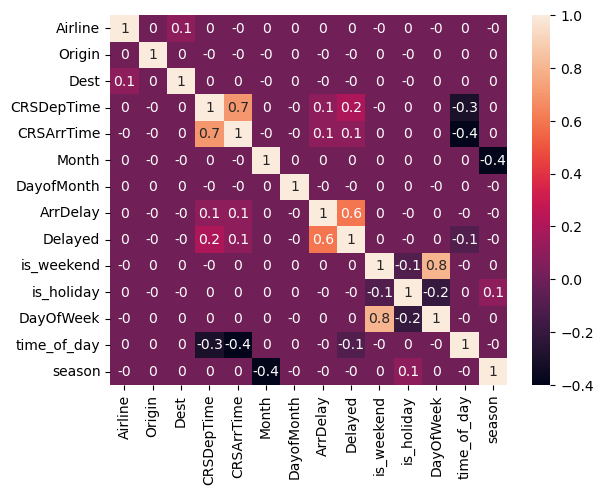

In [45]:

corr = data_cleaned.corr().round(1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

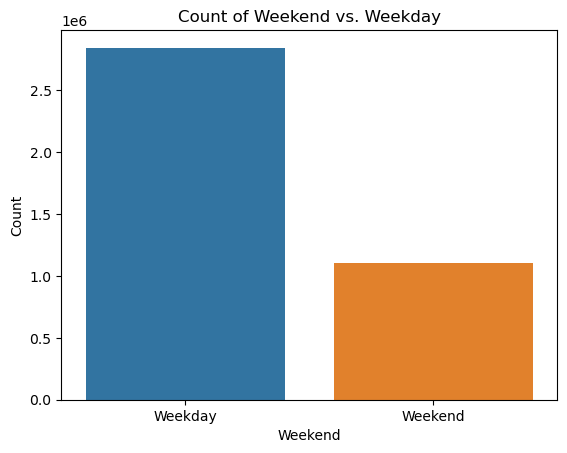

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the count of each category
weekend_counts = data_cleaned['is_weekend'].value_counts()

# Plotting the counts on a bar plot
sns.barplot(x=weekend_counts.index, y=weekend_counts.values)

# Adding labels and title
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Count of Weekend vs. Weekday')

# Customizing x-axis labels (optional)
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])

# Show plot
plt.show()

In [17]:
data_temp=pd.read_csv('flight_new_features1.csv')
data_temp

FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
3944911  2022-03-31                          Republic Airlines    EYW  EWR   
3944912  2022-03-31                          Republic Airlines    CLE  EWR   
3944913  2022-03-31                          Republic Airlines    IAD  PIT   
3944914  2022-03-19                          Republic Airlines    EWR  MEM   
3944915  2022-03-08                          Republic Airlines    ALB  ORD   

         CRSDepTime  CRSArrTime  Month  DayofMonth  Year  ArrDelay  Delayed  \
0              1133        1245      4           4  2022     -17.0        0   
1               732         849      4           4  2022      -1.0        0   
2              1529        1639      4           4  2022      -3.0        0   
3              1435        1605      4           4  2022     -18.0        0   
4              1135        1245      4           4  2022       6.0        0   
...             ...         ...    ...         ...   ...       ...      ...   
3944911        1617        1929      3          31  2022     207.0        1   
3944912        1418        1609      3          31  2022     201.0        1   
3944913        1750        1901      3          31  2022     180.0        1   
3944914        2035        2237      3          19  2022     135.0        1   
3944915        1700        1838      3           8  2022     381.0        1   

         is_weekend  is_holiday  DayOfWeek  CRSDepHour time_of_day  season  
0                 0           0          0          11     morning  spring  
1                 0           0          0           7     morning  spring  
2                 0           0          0          15   afternoon  spring  
3                 0           0          0          14   afternoon  spring  
4                 0           0          0          11     morning  spring  
...             ...         ...        ...         ...         ...     ...  
3944911           0           0          3          16   afternoon  spring  
3944912           0           0          3          14   afternoon  spring  
3944913           0           0          3          17     evening  spring  
3944914           1           0          5          20     evening  spring  
3944915           0           0          1          17     evening  spring  

[3944916 rows x 17 columns]

In [18]:
import pandas as pd

# Filter for weekends and delays
weekend_delays = data_temp[(data_temp['is_weekend'] == 1) & (data_temp['ArrDelay'] > 15)]

# Count the number of delays
count_weekend_delays = len(weekend_delays)

print(f"Number of flight delays on weekends: {count_weekend_delays}")

Number of flight delays on weekends: 246460


In [47]:
X = data_cleaned.drop(columns=['ArrDelay','Delayed'])
y = data_cleaned['Delayed']


In [48]:
X

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
0              6     141    97        1133        1245      4           4   
1              6     164   171         732         849      4           4   
2              6     103    97        1529        1639      4           4   
3              6     171   143        1435        1605      4           4   
4              6     103    97        1135        1245      4           4   
...          ...     ...   ...         ...         ...    ...         ...   
3944911       16     122   121        1617        1929      3          31   
3944912       16      73   121        1418        1609      3          31   
3944913       16     169   276        1750        1901      3          31   
3944914       16     121   223        2035        2237      3          19   
3944915       16      14   255        1700        1838      3           8   

         is_weekend  is_holiday  DayOfWeek  time_of_day  season  
0                 0           0          0            2       0  
1                 0           0          0            2       0  
2                 0           0          0            0       0  
3                 0           0          0            0       0  
4                 0           0          0            2       0  
...             ...         ...        ...          ...     ...  
3944911           0           0          3            0       0  
3944912           0           0          3            0       0  
3944913           0           0          3            1       0  
3944914           1           0          5            1       0  
3944915           0           0          1            1       0  

[3944916 rows x 12 columns]

In [49]:
y

0          0
1          0
2          0
3          0
4          0
          ..
3944911    1
3944912    1
3944913    1
3944914    1
3944915    1
Name: Delayed, Length: 3944916, dtype: int64

### SMOTE (Synthetic Minority Over-sampling Technique)  to handle imbalance in the dataset

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the balance of the resampled target variable
print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_res)}')

# Concatenate the resampled features and target variable into one DataFrame
resampled_df = pd.concat([pd.DataFrame(X_train_res, columns=X_train.columns), pd.DataFrame(y_train_res, columns=['Delayed'])], axis=1)


Original dataset shape: Counter({0: 2182598, 1: 578843})
Resampled dataset shape: Counter({0: 2182598, 1: 2182598})


In [51]:
resampled_df

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
0              8      23    12         855         952      1          20   
1              3     276    98         727         928      6           1   
2              7     129   185        1128        1420      2           4   
3             17     171   230        1825        2111      4           2   
4             14     121   196        1110        1432      3          11   
...          ...     ...   ...         ...         ...    ...         ...   
4365191       17      22   171        1317        1655      6          17   
4365192       18     318   353        1350        1545      4           8   
4365193        9     210    98        1459        1628      7          13   
4365194        5      94    46        1130        1232      4           8   
4365195       18     206   242        1444        1700      5          15   

         is_weekend  is_holiday  DayOfWeek  time_of_day  season  Delayed  
0                 0           0          3            2       2        0  
1                 0           0          2            2       1        0  
2                 0           0          4            2       2        0  
3                 1           0          5            1       0        0  
4                 0           0          4            2       0        0  
...             ...         ...        ...          ...     ...      ...  
4365191           0           0          0            0       1        1  
4365192           0           0          0            0       0        1  
4365193           0           0          2            0       1        1  
4365194           0           0          2            2       0        1  
4365195           0           0          2            0       0        1  

[4365196 rows x 13 columns]

In [52]:
# resampled_df.to_csv("flightDelay_smote_label_encoding_wo_year.csv")

In [53]:
resampled_df

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
0              8      23    12         855         952      1          20   
1              3     276    98         727         928      6           1   
2              7     129   185        1128        1420      2           4   
3             17     171   230        1825        2111      4           2   
4             14     121   196        1110        1432      3          11   
...          ...     ...   ...         ...         ...    ...         ...   
4365191       17      22   171        1317        1655      6          17   
4365192       18     318   353        1350        1545      4           8   
4365193        9     210    98        1459        1628      7          13   
4365194        5      94    46        1130        1232      4           8   
4365195       18     206   242        1444        1700      5          15   

         is_weekend  is_holiday  DayOfWeek  time_of_day  season  Delayed  
0                 0           0          3            2       2        0  
1                 0           0          2            2       1        0  
2                 0           0          4            2       2        0  
3                 1           0          5            1       0        0  
4                 0           0          4            2       0        0  
...             ...         ...        ...          ...     ...      ...  
4365191           0           0          0            0       1        1  
4365192           0           0          0            0       0        1  
4365193           0           0          2            0       1        1  
4365194           0           0          2            2       0        1  
4365195           0           0          2            0       0        1  

[4365196 rows x 13 columns]

### Rechecking if All Groups are Included in the Data After SMOTE

In [54]:
resampled_df['Airline'].unique()

array([ 8,  3,  7, 17, 14,  2,  0, 18, 20,  9, 15, 11, 19,  5,  6,  1, 16,
        4, 10, 13, 12])

In [55]:
resampled_df['Origin'].nunique()

375

In [56]:
resampled_df['Dest'].nunique()

375

In [57]:
resampled_df['Month'].unique()

array([1, 6, 2, 4, 3, 5, 7], dtype=int64)

In [87]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Define the features and target
# features = ['Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'Year', 
#             'is_weekend', 'is_holiday', 'DayOfWeek', 'time_of_day', 'season']
# target = 'Delayed'

# # Perform stratified sampling
# df_sampled, _ = train_test_split(resampled_df, train_size=1000000, stratify=resampled_df[target], random_state=42)

# # Verify the shape of the new dataset
# print(df_sampled.shape)

# # Check the distribution of the target variable in both datasets
# print("Original distribution:")
# print(resampled_df[target].value_counts(normalize=True))
# print("\nSampled distribution:")
# print(df_sampled[target].value_counts(normalize=True))

# # Check the distribution of categorical variables
# for feature in ['Airline', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'time_of_day', 'season']:
#     print(f"\nDistribution of {feature}:")
#     print("Original:")
#     print(resampled_df[feature].value_counts(normalize=True).head())
#     print("Sampled:")
#     print(df_sampled[feature].value_counts(normalize=True).head())

# # Save the sampled dataset
# df_sampled.to_csv("sampled_dataset.csv", index=False)

(1000000, 14)
Original distribution:
0    0.5
1    0.5
Name: Delayed, dtype: float64

Sampled distribution:
1    0.5
0    0.5
Name: Delayed, dtype: float64

Distribution of Airline:
Original:
18    0.186170
3     0.121736
7     0.116637
17    0.102187
20    0.080466
Name: Airline, dtype: float64
Sampled:
18    0.185732
3     0.121612
7     0.117308
17    0.101678
20    0.080953
Name: Airline, dtype: float64

Distribution of Origin:
Original:
23     0.043754
97     0.042961
255    0.041517
98     0.039065
75     0.030668
Name: Origin, dtype: float64
Sampled:
23     0.044046
97     0.043013
255    0.041661
98     0.039069
75     0.030403
Name: Origin, dtype: float64

Distribution of Dest:
Original:
23     0.041792
255    0.039290
97     0.038499
98     0.036524
75     0.029089
Name: Dest, dtype: float64
Sampled:
23     0.042077
255    0.039632
97     0.038399
98     0.036396
75     0.029046
Name: Dest, dtype: float64

Distribution of Month:
Original:
6    0.166622
4    0.155846
3    0.15

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the features and target
features = ['Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth', 'Year', 
            'is_weekend', 'is_holiday', 'DayOfWeek', 'time_of_day', 'season']
target = 'Delayed'

# Perform stratified sampling
df_sampled, _ = train_test_split(resampled_df, train_size=3000000, stratify=resampled_df[target], random_state=42)

# Verify the shape of the new dataset
print(df_sampled.shape)

# Check the distribution of the target variable in both datasets
print("Original distribution:")
print(resampled_df[target].value_counts(normalize=True))
print("\nSampled distribution:")
print(df_sampled[target].value_counts(normalize=True))

# Check the distribution of categorical variables
for feature in ['Airline', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'time_of_day', 'season']:
    print(f"\nDistribution of {feature}:")
    print("Original:")
    print(resampled_df[feature].value_counts(normalize=True).head())
    print("Sampled:")
    print(df_sampled[feature].value_counts(normalize=True).head())

# Save the sampled dataset
df_sampled.to_csv("sampled_dataset.csv", index=False)

(3000000, 13)
Original distribution:
0    0.5
1    0.5
Name: Delayed, dtype: float64

Sampled distribution:
1    0.5
0    0.5
Name: Delayed, dtype: float64

Distribution of Airline:
Original:
18    0.186170
3     0.121736
7     0.116637
17    0.102187
20    0.080466
Name: Airline, dtype: float64
Sampled:
18    0.186017
3     0.121794
7     0.116733
17    0.102048
20    0.080540
Name: Airline, dtype: float64

Distribution of Origin:
Original:
23     0.043754
97     0.042961
255    0.041517
98     0.039065
75     0.030668
Name: Origin, dtype: float64
Sampled:
23     0.043891
97     0.042875
255    0.041489
98     0.038982
75     0.030687
Name: Origin, dtype: float64

Distribution of Dest:
Original:
23     0.041792
255    0.039290
97     0.038499
98     0.036524
75     0.029089
Name: Dest, dtype: float64
Sampled:
23     0.041818
255    0.039328
97     0.038503
98     0.036576
75     0.029077
Name: Dest, dtype: float64

Distribution of Month:
Original:
6    0.166622
4    0.155846
3    0.15

In [59]:
df_sampled['Airline'].unique()

array([14, 18, 20,  4,  7,  8,  3, 17,  9,  2, 10, 16, 12,  6, 19, 15,  5,
        1, 13,  0, 11])

In [60]:
df_sampled['Origin'].nunique()

375

In [61]:
df_sampled['Dest'].nunique()

375

In [62]:
df_sampled['Month'].unique()

array([6, 3, 4, 5, 1, 7, 2], dtype=int64)

In [76]:
df_sampled

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
2849230       14     236    74        1540        1834      6           2   
201698        14     129    14        1315        1615      3           5   
1636082       18     333   319        1550        1750      4          16   
1022968       18     270   160         900        1255      6           4   
4323682       20     121   218        1700        1956      4           2   
...          ...     ...   ...         ...         ...    ...         ...   
1416418       18      46   276         945        1210      2          14   
1896388       13     294   319         947        1101      5          29   
3942332       14      46   255        1118        1304      5          11   
2729546        7      48   241         805        1028      5           2   
3211214        7     276    23        1959        2146      3           2   

         is_weekend  is_holiday  DayOfWeek  time_of_day  season  Delayed  
2849230           0           0          4            0       0        1  
201698            1           0          5            0       0        0  
1636082           1           0          5            0       0        0  
1022968           1           0          5            2       1        0  
4323682           1           0          5            1       0        1  
...             ...         ...        ...          ...     ...      ...  
1416418           0           0          0            2       2        0  
1896388           1           0          6            2       0        0  
3942332           1           0          5            2       0        1  
2729546           0           0          0            2       0        0  
3211214           0           0          3            1       1        1  

[3000000 rows x 13 columns]

## Modeling

In [77]:
# Split data into features and target
X = df_sampled.drop(['Delayed'], axis=1)
y = df_sampled['Delayed']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [78]:
X

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
2849230       14     236    74        1540        1834      6           2   
201698        14     129    14        1315        1615      3           5   
1636082       18     333   319        1550        1750      4          16   
1022968       18     270   160         900        1255      6           4   
4323682       20     121   218        1700        1956      4           2   
...          ...     ...   ...         ...         ...    ...         ...   
1416418       18      46   276         945        1210      2          14   
1896388       13     294   319         947        1101      5          29   
3942332       14      46   255        1118        1304      5          11   
2729546        7      48   241         805        1028      5           2   
3211214        7     276    23        1959        2146      3           2   

         is_weekend  is_holiday  DayOfWeek  time_of_day  season  
2849230           0           0          4            0       0  
201698            1           0          5            0       0  
1636082           1           0          5            0       0  
1022968           1           0          5            2       1  
4323682           1           0          5            1       0  
...             ...         ...        ...          ...     ...  
1416418           0           0          0            2       2  
1896388           1           0          6            2       0  
3942332           1           0          5            2       0  
2729546           0           0          0            2       0  
3211214           0           0          3            1       1  

[3000000 rows x 12 columns]

In [79]:
y

2849230    1
201698     0
1636082    0
1022968    0
4323682    1
          ..
1416418    0
1896388    0
3942332    1
2729546    0
3211214    1
Name: Delayed, Length: 3000000, dtype: int64

## Random Forest Model

In [34]:
%%time
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


CPU times: total: 11min 7s
Wall time: 18min 34s


RandomForestClassifier(random_state=42)

In [35]:
%%time
# Make predictions
y_pred = model.predict(X_test)

CPU times: total: 1min 7s
Wall time: 2min 26s


In [82]:
#score after using feature engineering and smote and considering 300000 rows>>rf without hyper parameter tuning and wo year column
# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.81      0.85      0.83    449500
           1       0.85      0.80      0.82    450500

    accuracy                           0.83    900000
   macro avg       0.83      0.83      0.83    900000
weighted avg       0.83      0.83      0.83    900000

Accuracy: 0.8286211111111111


Precision:

* Precision for Class 0 (0.81): Out of all flights predicted as not delayed, 81% were actually not delayed.
* Precision for Class 1 (0.84): Out of all flights predicted as delayed, 84% were actually delayed.
* Precision indicates the accuracy of the positive predictions. High precision means that there are few false positives.

Recall:

* Recall for Class 0 (0.85): Out of all flights that were actually not delayed, 85% were correctly predicted as not delayed.
* Recall for Class 1 (0.80): Out of all flights that were actually delayed, 80% were correctly predicted as delayed.
* Recall indicates the ability of the model to find all the relevant cases (true positives). High recall means that there are few false negatives.

In [46]:
import joblib

joblib.dump(model, 'random_forest_30M_wh.joblib')

['random_forest_30M_wh.joblib']

## prediction without is_weekend variable

In [66]:
# Split data into features and target
X_wo_is_weekend = df_sampled.drop(['Delayed','is_weekend'], axis=1)


In [67]:
X_wo_is_weekend

Airline  Origin  Dest  CRSDepTime  CRSArrTime  Month  DayofMonth  \
2849230       14     236    74        1540        1834      6           2   
201698        14     129    14        1315        1615      3           5   
1636082       18     333   319        1550        1750      4          16   
1022968       18     270   160         900        1255      6           4   
4323682       20     121   218        1700        1956      4           2   
...          ...     ...   ...         ...         ...    ...         ...   
1416418       18      46   276         945        1210      2          14   
1896388       13     294   319         947        1101      5          29   
3942332       14      46   255        1118        1304      5          11   
2729546        7      48   241         805        1028      5           2   
3211214        7     276    23        1959        2146      3           2   

         is_holiday  DayOfWeek  time_of_day  season  
2849230           0          4            0       0  
201698            0          5            0       0  
1636082           0          5            0       0  
1022968           0          5            2       1  
4323682           0          5            1       0  
...             ...        ...          ...     ...  
1416418           0          0            2       2  
1896388           0          6            2       0  
3942332           0          5            2       0  
2729546           0          0            2       0  
3211214           0          3            1       1  

[3000000 rows x 11 columns]

In [69]:
# Split into training and testing sets
X_train_wo_is_weekend, X_test_wo_is_weekend, y_train_wo_is_weekend, y_test_wo_is_weekend = train_test_split(X_wo_is_weekend, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_wo_is_weekend = scaler.fit_transform(X_train_wo_is_weekend)
X_test_wo_is_weekend = scaler.transform(X_test_wo_is_weekend)

In [70]:
%%time
# Train the model
model_wo_is_weekend = RandomForestClassifier(random_state=42)
model_wo_is_weekend.fit(X_train_wo_is_weekend, y_train_wo_is_weekend)


CPU times: total: 8min 59s
Wall time: 11min 15s


RandomForestClassifier(random_state=42)

In [71]:
%%time
# Make predictions
y_pred = model_wo_is_weekend.predict(X_test_wo_is_weekend)

CPU times: total: 42.8 s
Wall time: 45.8 s


In [73]:
#score after using feature engineering and smote and considering 200000 rows>>rf without hyper parameter tuning and wo year column
# Evaluate the model
print(classification_report(y_test_wo_is_weekend, y_pred))
print(f'Accuracy: {accuracy_score(y_test_wo_is_weekend, y_pred)}')

              precision    recall  f1-score   support

           0       0.81      0.85      0.83    449500
           1       0.84      0.80      0.82    450500

    accuracy                           0.82    900000
   macro avg       0.83      0.82      0.82    900000
weighted avg       0.83      0.82      0.82    900000

Accuracy: 0.8248422222222223


### Since removing 'is_weekend' from our data didn't make much of a difference, we will keep our old model as it is.

### Some Earlier Random Forest Model Results Based on Different Sampling Sizes

In [131]:
#score before featuring engineering and using undersampling
# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.63      0.64      0.63    247681
           1       0.63      0.62      0.63    247997

    accuracy                           0.63    495678
   macro avg       0.63      0.63      0.63    495678
weighted avg       0.63      0.63      0.63    495678

Accuracy: 0.6309115998692699


In [107]:
#score after using feature engineering and smote and considering 100000 rows>>rf 
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.77      0.82      0.79    150129
           1       0.80      0.75      0.78    149871

    accuracy                           0.79    300000
   macro avg       0.79      0.79      0.79    300000
weighted avg       0.79      0.79      0.79    300000

Accuracy: 0.7852466666666666


In [65]:
#score after using feature engineering and smote and considering 200000 rows>>rf and without year column
# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.80      0.84      0.82    300457
           1       0.83      0.79      0.81    299543

    accuracy                           0.81    600000
   macro avg       0.82      0.81      0.81    600000
weighted avg       0.82      0.81      0.81    600000

Accuracy: 0.8142783333333333


### Model training on other machine learning models

In [74]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Logistic Regression

In [75]:
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [76]:
# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.6217933333333333
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61    300457
           1       0.62      0.64      0.63    299543

    accuracy                           0.62    600000
   macro avg       0.62      0.62      0.62    600000
weighted avg       0.62      0.62      0.62    600000



## XGBoost

In [77]:
# XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


C:\Users\kashm\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [78]:
# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost Accuracy: 0.7751133333333333
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78    300457
           1       0.80      0.73      0.77    299543

    accuracy                           0.78    600000
   macro avg       0.78      0.78      0.77    600000
weighted avg       0.78      0.78      0.77    600000



## LightGBM 

In [79]:
# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 700457, number of negative: 699543
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 1400000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500326 -> initscore=0.001306
[LightGBM] [Info] Start training from score 0.001306


In [80]:
# Evaluate LightGBM
print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_pred))
print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_pred))

LightGBM Accuracy: 0.74217
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75    300457
           1       0.76      0.71      0.73    299543

    accuracy                           0.74    600000
   macro avg       0.74      0.74      0.74    600000
weighted avg       0.74      0.74      0.74    600000



### Hyper parameter tuning for random forest

In [2]:
%%time 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import time

# Define the parameter space
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
start_time = time.time()
random_search.fit(X_train, y_train)
print(f"RandomizedSearchCV took {time.time() - start_time:.2f} seconds for 100 candidates parameter settings.")

# Get the best parameters
best_params = random_search.best_params_
print("\nBest parameters found:")
print(best_params)



In [ ]:
%%time
# Train a new model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Feature importance
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

print("\nTop 10 most important features:")
for idx in sorted_idx[-10:]:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

## Evaluation and Reporting

Random Forest:

* Precision: 0.83

* Recall: 0.83

* F1-score: 0.83

* Accuracy: 0.8286

Logistic Regression:

* Precision: 0.62

* Recall: 0.62

* F1-score: 0.62

* Accuracy: 0.6218

XGBoost:

* Precision: 0.78

* Recall: 0.78

* F1-score: 0.77

* Accuracy: 0.7751

LightGBM:

* Precision: 0.74

* Recall: 0.74

* F1-score: 0.74

* Accuracy: 0.7422

Conclusion:
Random Forest emerges as the best-performing model based on the provided metrics:

* Accuracy: Random Forest has the highest accuracy at 0.8286, indicating it correctly classifies 82.86% of the instances in the test set. This is a substantial improvement over the other models, especially Logistic Regression.


* Precision, Recall, and F1-Score: Random Forest has balanced precision, recall, and F1-score of 0.83 for both classes. This balance indicates that the model is neither overly sensitive (high recall but low precision) nor overly specific (high precision but low recall).


* Consistency Across Metrics: Random Forest consistently performs well across all metrics. The uniformity in precision, recall, and F1-score suggests it is likely to maintain its performance on unseen data.

## External validation

In [70]:
#correct prediction =1
def predict_delay(flightdate, airline, origin, dest, crs_dep_time, crs_arr_time):
    new_data = pd.DataFrame({
        'FlightDate':[flightdate],
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time]
    })

    #preprocessing
    # Convert FlightDate to datetime
    new_data['FlightDate'] = pd.to_datetime(new_data['FlightDate'])
    
    # Extract the year, month, and day of month from 'FlightDate'
#     new_data['Year'] = new_data['FlightDate'].dt.year
    new_data['Month'] = new_data['FlightDate'].dt.month
    new_data['DayofMonth'] = new_data['FlightDate'].dt.day

    # Create 'is_weekend' feature
    # data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
    new_data['is_weekend'] = (new_data['FlightDate'].dt.dayofweek >= 5).astype(int)

    from pandas.tseries.holiday import USFederalHolidayCalendar
    # Is it a holiday?
    # Create 'is_holiday' feature using USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=new_data['FlightDate'].min(), end=new_data['FlightDate'].max())
    # data['is_holiday'] = data['FlightDate'].isin(holidays)

    new_data['is_holiday'] = new_data['FlightDate'].isin(holidays).astype(int)

    # Create 'DayOfWeek' feature
    # Monday=0>>Sunday=6
    new_data['DayOfWeek'] = new_data['FlightDate'].dt.dayofweek


    # Create 'time_of_day' feature
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    new_data['CRSDepHour'] = new_data['CRSDepTime'] // 100
    new_data['time_of_day'] = new_data['CRSDepHour'].apply(get_time_of_day)

    # Create 'season' feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'fall'

    new_data['season'] = new_data['Month'].apply(get_season)
    
    new_data = new_data.drop(columns=['FlightDate', 'CRSDepHour'])
    
    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest', 'time_of_day', 'season']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('2023-4-24','Spirit Air Lines', 'IND', 'EWR', 2150, 2349))
#'2022-5-8','SkyWest Airlines Inc.', 'MSP', 'FSD', 2255, 2350>>1
#JetBlue Airways 	DCA	BOS	730	859	3	30	2022	1

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
#correct prediction =0
def predict_delay(flightdate, airline, origin, dest, crs_dep_time, crs_arr_time):
    new_data = pd.DataFrame({
        'FlightDate':[flightdate],
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time]
    })

    #preprocessing
    # Convert FlightDate to datetime
    new_data['FlightDate'] = pd.to_datetime(new_data['FlightDate'])
    
    # Extract the year, month, and day of month from 'FlightDate'
#     new_data['Year'] = new_data['FlightDate'].dt.year
    new_data['Month'] = new_data['FlightDate'].dt.month
    new_data['DayofMonth'] = new_data['FlightDate'].dt.day

    # Create 'is_weekend' feature
    # data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
    new_data['is_weekend'] = (new_data['FlightDate'].dt.dayofweek >= 5).astype(int)

    from pandas.tseries.holiday import USFederalHolidayCalendar
    # Is it a holiday?
    # Create 'is_holiday' feature using USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=new_data['FlightDate'].min(), end=new_data['FlightDate'].max())
    # data['is_holiday'] = data['FlightDate'].isin(holidays)

    new_data['is_holiday'] = new_data['FlightDate'].isin(holidays).astype(int)

    # Create 'DayOfWeek' feature
    # Monday=0>>Sunday=6
    new_data['DayOfWeek'] = new_data['FlightDate'].dt.dayofweek


    # Create 'time_of_day' feature
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    new_data['CRSDepHour'] = new_data['CRSDepTime'] // 100
    new_data['time_of_day'] = new_data['CRSDepHour'].apply(get_time_of_day)

    # Create 'season' feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'fall'

    new_data['season'] = new_data['Month'].apply(get_season)
    
    new_data = new_data.drop(columns=['FlightDate', 'CRSDepHour'])
    
    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest', 'time_of_day', 'season']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('2022-4-4','Commutair Aka Champlain Enterprises, Inc.', 'IAH', 'GPT', 1435, 1605))
#'2022-5-8','SkyWest Airlines Inc.', 'MSP', 'FSD', 2255, 2350>>1
#JetBlue Airways 	DCA	BOS	730	859	3	30	2022	1

On Time


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
#correct answer 0
def predict_delay(flightdate, airline, origin, dest, crs_dep_time, crs_arr_time):
    new_data = pd.DataFrame({
        'FlightDate':[flightdate],
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time]
    })

    #preprocessing
    # Convert FlightDate to datetime
    new_data['FlightDate'] = pd.to_datetime(new_data['FlightDate'])
    
    # Extract the year, month, and day of month from 'FlightDate'
#     new_data['Year'] = new_data['FlightDate'].dt.year
    new_data['Month'] = new_data['FlightDate'].dt.month
    new_data['DayofMonth'] = new_data['FlightDate'].dt.day

    # Create 'is_weekend' feature
    # data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
    new_data['is_weekend'] = (new_data['FlightDate'].dt.dayofweek >= 5).astype(int)

    from pandas.tseries.holiday import USFederalHolidayCalendar
    # Is it a holiday?
    # Create 'is_holiday' feature using USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=new_data['FlightDate'].min(), end=new_data['FlightDate'].max())
    # data['is_holiday'] = data['FlightDate'].isin(holidays)

    new_data['is_holiday'] = new_data['FlightDate'].isin(holidays).astype(int)

    # Create 'DayOfWeek' feature
    # Monday=0>>Sunday=6
    new_data['DayOfWeek'] = new_data['FlightDate'].dt.dayofweek


    # Create 'time_of_day' feature
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    new_data['CRSDepHour'] = new_data['CRSDepTime'] // 100
    new_data['time_of_day'] = new_data['CRSDepHour'].apply(get_time_of_day)

    # Create 'season' feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'fall'

    new_data['season'] = new_data['Month'].apply(get_season)
    
    new_data = new_data.drop(columns=['FlightDate', 'CRSDepHour'])
    
    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest', 'time_of_day', 'season']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('2024-6-25','Spirit Air Lines', 'IND', 'EWR', 1548, 1342))

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
#correct =1
def predict_delay(flightdate, airline, origin, dest, crs_dep_time, crs_arr_time):
    new_data = pd.DataFrame({
        'FlightDate':[flightdate],
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time]
    })

    #preprocessing
    # Convert FlightDate to datetime
    new_data['FlightDate'] = pd.to_datetime(new_data['FlightDate'])
    
    # Extract the year, month, and day of month from 'FlightDate'
#     new_data['Year'] = new_data['FlightDate'].dt.year
    new_data['Month'] = new_data['FlightDate'].dt.month
    new_data['DayofMonth'] = new_data['FlightDate'].dt.day

    # Create 'is_weekend' feature
    # data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
    new_data['is_weekend'] = (new_data['FlightDate'].dt.dayofweek >= 5).astype(int)

    from pandas.tseries.holiday import USFederalHolidayCalendar
    # Is it a holiday?
    # Create 'is_holiday' feature using USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=new_data['FlightDate'].min(), end=new_data['FlightDate'].max())
    # data['is_holiday'] = data['FlightDate'].isin(holidays)

    new_data['is_holiday'] = new_data['FlightDate'].isin(holidays).astype(int)

    # Create 'DayOfWeek' feature
    # Monday=0>>Sunday=6
    new_data['DayOfWeek'] = new_data['FlightDate'].dt.dayofweek


    # Create 'time_of_day' feature
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    new_data['CRSDepHour'] = new_data['CRSDepTime'] // 100
    new_data['time_of_day'] = new_data['CRSDepHour'].apply(get_time_of_day)

    # Create 'season' feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'fall'

    new_data['season'] = new_data['Month'].apply(get_season)
    
    new_data = new_data.drop(columns=['FlightDate', 'CRSDepHour'])
    
    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest', 'time_of_day', 'season']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('2022-5-8','SkyWest Airlines Inc.', 'MSP', 'FSD', 2255, 2350))
#'2022-5-8','SkyWest Airlines Inc.', 'MSP', 'FSD', 2255, 2350>>1
#JetBlue Airways 	DCA	BOS	730	859	3	30	2022	1

C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Delayed


In [43]:
#correct =1
def predict_delay(flightdate, airline, origin, dest, crs_dep_time, crs_arr_time):
    new_data = pd.DataFrame({
        'FlightDate':[flightdate],
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time]
    })

    #preprocessing
    # Convert FlightDate to datetime
    new_data['FlightDate'] = pd.to_datetime(new_data['FlightDate'])
    
    # Extract the year, month, and day of month from 'FlightDate'
#     new_data['Year'] = new_data['FlightDate'].dt.year
    new_data['Month'] = new_data['FlightDate'].dt.month
    new_data['DayofMonth'] = new_data['FlightDate'].dt.day

    # Create 'is_weekend' feature
    # data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
    new_data['is_weekend'] = (new_data['FlightDate'].dt.dayofweek >= 5).astype(int)

    from pandas.tseries.holiday import USFederalHolidayCalendar
    # Is it a holiday?
    # Create 'is_holiday' feature using USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=new_data['FlightDate'].min(), end=new_data['FlightDate'].max())
    # data['is_holiday'] = data['FlightDate'].isin(holidays)

    new_data['is_holiday'] = new_data['FlightDate'].isin(holidays).astype(int)

    # Create 'DayOfWeek' feature
    # Monday=0>>Sunday=6
    new_data['DayOfWeek'] = new_data['FlightDate'].dt.dayofweek


    # Create 'time_of_day' feature
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    new_data['CRSDepHour'] = new_data['CRSDepTime'] // 100
    new_data['time_of_day'] = new_data['CRSDepHour'].apply(get_time_of_day)

    # Create 'season' feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'fall'

    new_data['season'] = new_data['Month'].apply(get_season)
    
    new_data = new_data.drop(columns=['FlightDate', 'CRSDepHour'])
    
    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest', 'time_of_day', 'season']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('2022-3-31','Republic Airlines', 'EYW', 'EWR', 1617, 1929))
#'2022-5-8','SkyWest Airlines Inc.', 'MSP', 'FSD', 2255, 2350>>1
#JetBlue Airways 	DCA	BOS	730	859	3	30	2022	1

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# correct prediction =0
def predict_delay(flightdate, airline, origin, dest, crs_dep_time, crs_arr_time):
    new_data = pd.DataFrame({
        'FlightDate':[flightdate],
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time]
    })

    #preprocessing
    # Convert FlightDate to datetime
    new_data['FlightDate'] = pd.to_datetime(new_data['FlightDate'])
    
    # Extract the year, month, and day of month from 'FlightDate'
#     new_data['Year'] = new_data['FlightDate'].dt.year
    new_data['Month'] = new_data['FlightDate'].dt.month
    new_data['DayofMonth'] = new_data['FlightDate'].dt.day

    # Create 'is_weekend' feature
    # data['is_weekend'] = data['FlightDate'].dt.dayofweek >= 5
    new_data['is_weekend'] = (new_data['FlightDate'].dt.dayofweek >= 5).astype(int)

    from pandas.tseries.holiday import USFederalHolidayCalendar
    # Is it a holiday?
    # Create 'is_holiday' feature using USFederalHolidayCalendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=new_data['FlightDate'].min(), end=new_data['FlightDate'].max())
    # data['is_holiday'] = data['FlightDate'].isin(holidays)

    new_data['is_holiday'] = new_data['FlightDate'].isin(holidays).astype(int)

    # Create 'DayOfWeek' feature
    # Monday=0>>Sunday=6
    new_data['DayOfWeek'] = new_data['FlightDate'].dt.dayofweek


    # Create 'time_of_day' feature
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'morning'
        elif 12 <= hour < 17:
            return 'afternoon'
        elif 17 <= hour < 21:
            return 'evening'
        else:
            return 'night'

    new_data['CRSDepHour'] = new_data['CRSDepTime'] // 100
    new_data['time_of_day'] = new_data['CRSDepHour'].apply(get_time_of_day)

    # Create 'season' feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'fall'

    new_data['season'] = new_data['Month'].apply(get_season)
    
    new_data = new_data.drop(columns=['FlightDate', 'CRSDepHour'])
    
    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest', 'time_of_day', 'season']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('2024-6-25','Spirit Air Lines', 'IND', 'EWR', 1548, 1342))
#'2022-5-8','SkyWest Airlines Inc.', 'MSP', 'FSD', 2255, 2350>>1
#JetBlue Airways 	DCA	BOS	730	859	3	30	2022	1

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [112]:
import joblib

# Save the model to a file
joblib_file = "smote_random_forest_model_wh.joblib"
joblib.dump(model, joblib_file)

['smote_random_forest_model_wh.joblib']

## With Hyper parameter tuning

In [116]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Predict on the test set
y_pred = random_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\kashm\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
exception calling callback for <Future at 0x17d8e168220 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 360, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 797, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\par

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [118]:
%%time
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Convert the dataset into an optimized data structure called DMatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for the model
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 6, 
    'eta': 0.3,  # Learning rate
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the model
num_rounds = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_rounds)


CPU times: total: 3min 23s
Wall time: 30.2 s


In [119]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming X and y are already defined
# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert the dataset into an optimized data structure called DMatrix that XGBoost supports
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # Set parameters for the model
# params = {
#     'objective': 'binary:logistic',  # For binary classification
#     'max_depth': 6, 
#     'eta': 0.3,  # Learning rate
#     'eval_metric': 'logloss'  # Evaluation metric
# }

# # Train the model
# num_rounds = 100  # Number of boosting rounds
# bst = xgb.train(params, dtrain, num_rounds)

# Predict the labels of the test set
y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7650
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77    150129
           1       0.79      0.73      0.76    149871

    accuracy                           0.77    300000
   macro avg       0.77      0.76      0.76    300000
weighted avg       0.77      0.77      0.76    300000



In [121]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for XGBoost:", xgb_random.best_params_)

# Make predictions
y_pred = xgb_random.predict(X_test)

# Print the classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Fitting 5 folds for each of 100 candidates, totalling 500 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [122]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_dist = {
    'num_leaves': [31, 50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_samples': [20, 30, 50, 100],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
lgb_random = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, 
                                n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
lgb_random.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for LightGBM:", lgb_random.best_params_)

# Make predictions
y_pred = lgb_random.predict(X_test)

# Print the classification report
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


exception calling callback for <Future at 0x17dd2e4d6d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 360, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 797, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\parallel.py", line 782, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\kashm\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create a Logistic Regression classifier
lr_model = LogisticRegression(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
lr_random = RandomizedSearchCV(estimator=lr_model, param_distributions=param_dist, 
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
lr_random.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters for Logistic Regression:", lr_random.best_params_)

# Make predictions
y_pred = lr_random.predict(X_test_scaled)

# Print the classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


## score before featuring engineering and using undersampling

In [133]:

def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Republic Airlines', 'EYW', 'EWR', 1617, 1929, 2022, 3, 31))

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [134]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Commutair Aka Champlain Enterprises, Inc.', 'DRO', 'DEN', 1135, 1245, 2022, 4, 4))

On Time


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [137]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Spirit Air Lines', 'IND', 'EWR', 2150, 2349, 2022, 4, 24))

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [138]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Spirit Air Lines', 'IND', 'EWR', 2019, 1025, 2024, 6, 24))

On Time


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# JetBlue Airways	DCA	BOS	730	859	3	30	2022	

In [139]:
#Saving Scikitlearn models
import joblib
joblib.dump(model, "random_forest_model_wh.pkl")

['random_forest_model_wh.pkl']

In [143]:
import joblib

filename = 'random_forest_model_wh.joblib'
joblib.dump(model, filename)
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

MemoryError: could not allocate 11608016 bytes

In [ ]:
import pickle

filename = 'random_forest_model_wh.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# load the model from disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

In [142]:
# import pickle
# filename = 'random_forest_model_wh.sav'
# pickle.dump(model, open(filename, 'wb'))
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result,'% Acuuracy')

MemoryError: 

In [144]:
df_new.to_csv("flight_cleaned_rf_wh.csv")

In [1]:
df_downsampled.to_csv("flight_cleaned.csv")

NameError: name 'df_downsampled' is not defined